In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
SMALL_SIZE = 18
MEDIUM_SIZE = 22
BIGGER_SIZE = 22
plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

$p_{i} = \sigma_{i}(\pi \epsilon_{i} + \mu_{i})$

In [2]:
def index(pi=2, sigma=1, mu=0.5, epsilon=1): 
    index = sigma*(pi*epsilon+mu)
    return index
def gini_coefficient(x):
    """Compute Gini coefficient of array of values"""
    diffsum = 0
    for i, xi in enumerate(x[:-1], 1):
        diffsum += np.sum(np.abs(xi - x[i:]))
    return diffsum / (len(x)**2 * np.mean(x))

def gini(list_of_values):
    sorted_list = sorted(list_of_values)
    height, area = 0, 0
    for value in sorted_list:
        height += value
        area += height - value / 2.
    fair_area = height * len(list_of_values) / 2.
    return (fair_area - area) / fair_area

def plot_index_pi(function): 
    t1 = np.arange(0.0, 5.0, 0.2)
    plt.figure(figsize=(10,10))
    plt.plot(t1, function(pi=t1), 'o--', label='$\sigma_i$ = 1', color='black', markersize=10)
    plt.plot(t1, function(pi=t1, sigma=2), '+--', label='$\sigma_i$ = 2', color='black', markersize=10)
    plt.plot(t1, function(pi=t1, sigma=3), '<--', label='$\sigma_i$ = 3', color='black', markersize=10)
    plt.plot(t1, function(pi=t1, sigma=4), '*--', label='$\sigma_i$ = 4', color='black', markersize=10)
    plt.xlabel('$\pi_i$')
    plt.ylabel('$p_i$')
    plt.legend()
    plt.show()
    
    
def plot_index_mu(function): 
    plt.figure(figsize=(10,10))
    t1 = np.arange(0.0, 6/7, 0.04)
    plt.plot(t1, function(mu=t1), 'o--', label='$\sigma_i$ = 1', color='black', markersize=10)
    plt.plot(t1, function(mu=t1, sigma=2), '+--', label='$\sigma_i$ = 2', color='black',markersize=10)
    plt.plot(t1, function(mu=t1, sigma=3), '<--', label='$\sigma_i$ = 3', color='black',markersize=10)
    plt.plot(t1, function(mu=t1, sigma=4), '*--', label='$\sigma_i$ = 4', color='black',markersize=10)
    plt.xlabel('$\mu_i$')
    plt.ylabel('$p_i$')
    plt.ylim(0,20)
    plt.legend()
    plt.show()

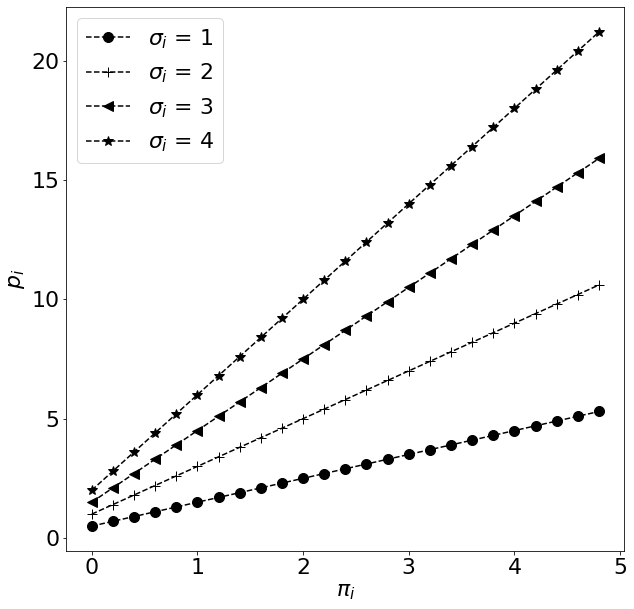

In [3]:
plot_index_pi(index)

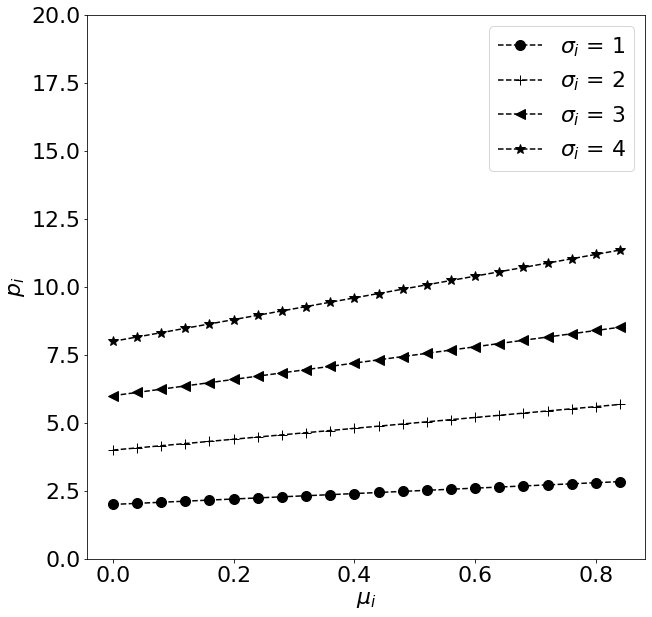

In [4]:
plot_index_mu(index)

In [5]:
from scipy.optimize import linprog

In [6]:
def tennis_model(alpha1 = 0.7, alpha2 = 0.95, lambda1 = 0.1, lambda2 = 0.15, gamma = 0.8, nu = 0.9, beta = 1.7):
    obj = [-1, 0, 0, 0, 0, 0, 0, 0]
    lhs_ineq = [[alpha1,  0, 0, 0, 0, 0, 0, -1],  # (2)
                [-alpha2,  0, 0, 0, 0, 0, 0, 1], 
               [0,  0, 0, 0, 0, 0, 0, -1], 
               [0,  0, 0, 0, 0, 0, 0, 1], 
               [gamma,  -1, 0, 0, 0, 0, 0, 0], 
               [0, gamma,  -1, 0, 0, 0, 0, 0], 
               [0, 0, gamma,  -1, 0, 0, 0, 0],
               [0, 0, 0, gamma,  -1, 0, 0, 0], 
               [0, 0, 0, 0, gamma,  -1, 0, 0], 
               [0, 0, 0, 0, 0, gamma,  -1, 0], 
               [-nu,  1, 0, 0, 0, 0, 0, 0], 
               [0, -nu,  1, 0, 0, 0, 0, 0], 
               [0, 0, -nu,  1, 0, 0, 0, 0],
               [0, 0, 0, -nu,  1, 0, 0, 0], 
               [0, 0, 0, 0, -nu,  1, 0, 0], 
               [0, 0, 0, 0, 0, -nu,  1, 0], 
               [0, 0, 0, 0, 0, 0,  beta, -1], 
               [0, 0, 0, 0, 0, 0,  -2, 1]]  # Yellow constraint left side

    rhs_ineq = [0,  # Red constraint right side
                0, 
               -lambda1,
               lambda2, 
               0, 
               0, 
               0, 
               0, 
               0, 
               0,
               0, 
               0, 
               0, 
               0, 
               0, 
               0, 
               0, 
               0]  # Yellow constraint right side

    lhs_eq = [[1, 1, 1, 1, 1, 1, 1, 1]]  # Green constraint left side
    rhs_eq = [1]       # Green constraint right side

    bnd = [(0, float("inf")),  # Bounds of x
            (0, float("inf")), 
          (0, float("inf")), 
          (0, float("inf")), 
          (0, float("inf")), 
          (0, float("inf")), 
          (0, float("inf")), 
          (0, float("inf"))]  # Bounds of y
    
    opt = linprog(c=obj, A_ub=lhs_ineq, b_ub=rhs_ineq,
              A_eq=lhs_eq, b_eq=rhs_eq, bounds=bnd,
    )

    print(opt.x)
    plt.figure(figsize=(10,10))
    x = [i for i in range(1,9)]
    y = opt.x
    plt.plot(x, pd.DataFrame(y, columns=['prize per round'])['prize per round'].cumsum(), 'x-.', color='black',)
    plt.ylim(0,1)
    plt.xlabel('Round $k$')
    plt.ylabel('Prize (%) for each round')
    plt.show()
    
    for key,val in opt.items():
         print(key,val)
    
    return opt.x

[0.20734036 0.16587229 0.13269783 0.10615826 0.08959151 0.08063236
 0.07256913 0.14513825]


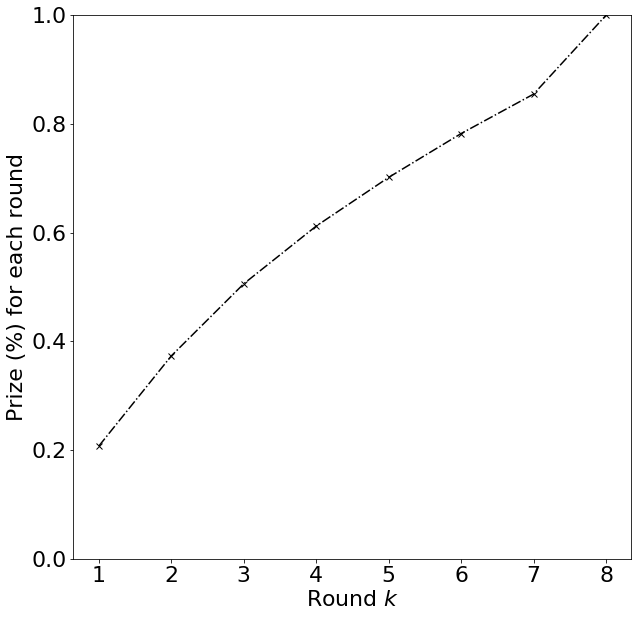

x [0.20734036 0.16587229 0.13269783 0.10615826 0.08959151 0.08063236
 0.07256913 0.14513825]
fun -0.20734036072103437
nit 21
status 0
slack [0.         0.05183509 0.10486175 0.         0.         0.
 0.         0.0046649  0.00895915 0.00806324 0.02073404 0.01658723
 0.01326978 0.00595092 0.         0.02177074 0.         0.        ]
message Optimization terminated successfully.
success True


array([0.20734036, 0.16587229, 0.13269783, 0.10615826, 0.08959151,
       0.08063236, 0.07256913, 0.14513825])

In [7]:
sol = tennis_model(alpha1 = 0.7, alpha2 = 0.95, lambda1 = 0.1, lambda2 = 0.25, gamma = 0.8, nu = 0.9, beta = 1.7)

sol

[0.21286962 0.1702957  0.13623656 0.10898925 0.0871914  0.07686959
 0.06918263 0.13836526]


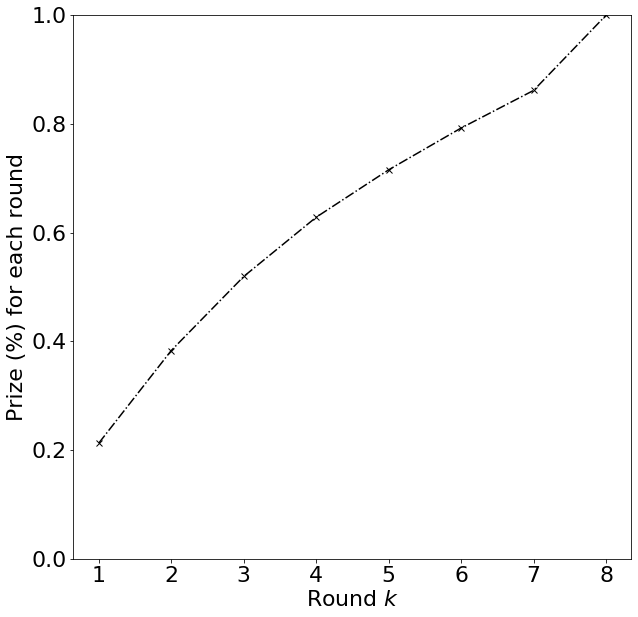

x [0.21286962 0.1702957  0.13623656 0.10898925 0.0871914  0.07686959
 0.06918263 0.13836526]
fun -0.21286962445068025
nit 22
status 0
slack [0.         0.06386089 0.11163474 0.         0.         0.
 0.         0.         0.00711647 0.00768696 0.02128696 0.01702957
 0.01362366 0.01089892 0.00160267 0.02075479 0.         0.        ]
message Optimization terminated successfully.
success True


In [8]:
sol2 = tennis_model(alpha1 = 0.65, alpha2 = 0.95, lambda1 = 0.1, lambda2 = 0.25, gamma = 0.8, nu = 0.9, beta = 1.7)

[0.22151927 0.17721541 0.14177233 0.11341787 0.09073429 0.07258743
 0.0609178  0.1218356 ]


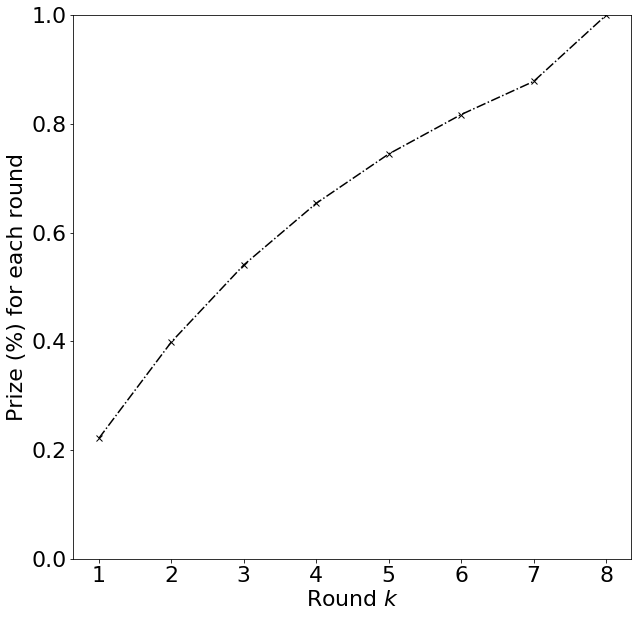

x [0.22151927 0.17721541 0.14177233 0.11341787 0.09073429 0.07258743
 0.0609178  0.1218356 ]
fun -0.22151926774591169
nit 23
status 0
slack [0.         0.08860771 0.1281644  0.         0.         0.
 0.         0.         0.         0.00284785 0.02215193 0.01772154
 0.01417723 0.01134179 0.00907343 0.01827534 0.         0.        ]
message Optimization terminated successfully.
success True


In [9]:
sol3 = tennis_model(alpha1 = 0.55, alpha2 = 0.95, lambda1 = 0.1, lambda2 = 0.25, gamma = 0.8, nu = 0.9, beta = 1.7)

[0.22742423 0.18193939 0.14555151 0.11644121 0.09315297 0.07452237
 0.0596179  0.10135043]


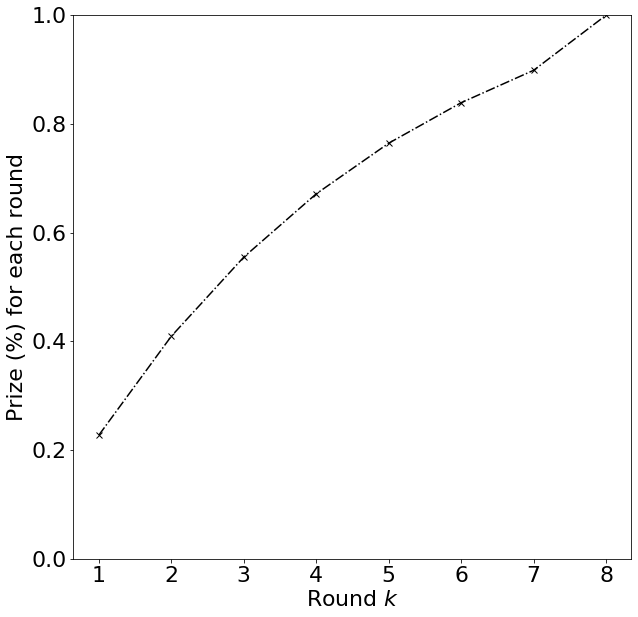

x [0.22742423 0.18193939 0.14555151 0.11644121 0.09315297 0.07452237
 0.0596179  0.10135043]
fun -0.22742423316187785
nit 24
status 0
slack [0.06723679 0.11470259 0.14864957 0.         0.         0.
 0.         0.         0.         0.         0.02274242 0.01819394
 0.01455515 0.01164412 0.0093153  0.00745224 0.         0.01788537]
message Optimization terminated successfully.
success True
[0.22742423 0.18193939 0.14555151 0.11644121 0.09315297 0.07452237
 0.0596179  0.10135043]


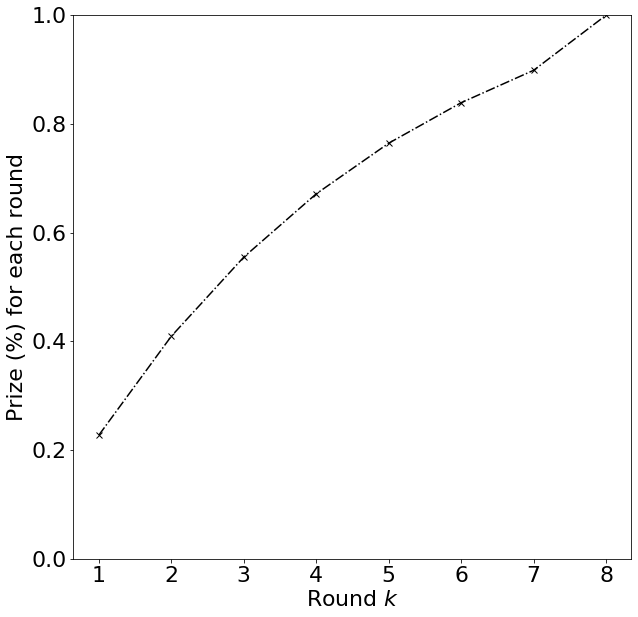

x [0.22742423 0.18193939 0.14555151 0.11644121 0.09315297 0.07452237
 0.0596179  0.10135043]
fun -0.22742423316187785
nit 24
status 0
slack [0.04449437 0.11470259 0.14864957 0.         0.         0.
 0.         0.         0.         0.         0.02274242 0.01819394
 0.01455515 0.01164412 0.0093153  0.00745224 0.         0.01788537]
message Optimization terminated successfully.
success True
[0.22742423 0.18193939 0.14555151 0.11644121 0.09315297 0.07452237
 0.0596179  0.10135043]


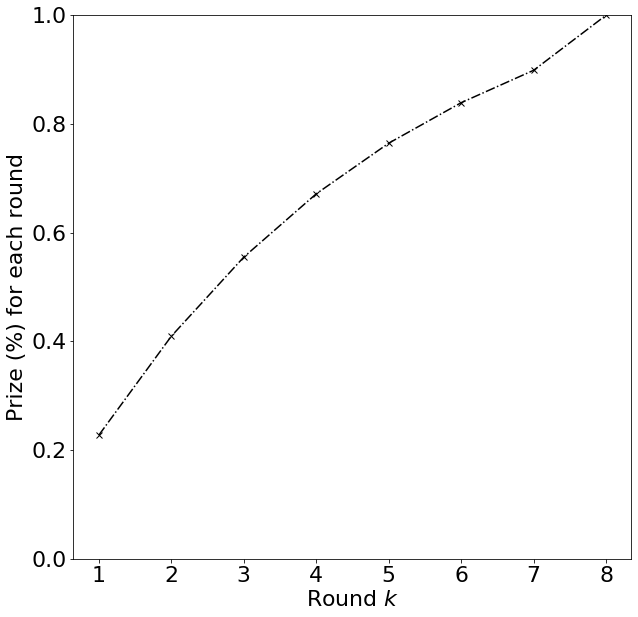

x [0.22742423 0.18193939 0.14555151 0.11644121 0.09315297 0.07452237
 0.0596179  0.10135043]
fun -0.22742423316187785
nit 24
status 0
slack [0.02175195 0.11470259 0.14864957 0.         0.         0.
 0.         0.         0.         0.         0.02274242 0.01819394
 0.01455515 0.01164412 0.0093153  0.00745224 0.         0.01788537]
message Optimization terminated successfully.
success True
[0.2271992  0.18175936 0.14540749 0.11632599 0.09306079 0.07444863
 0.05955891 0.10223964]


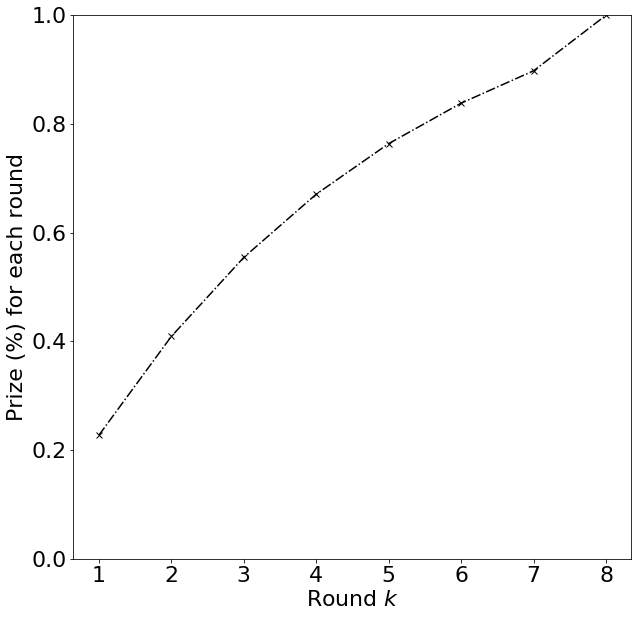

x [0.2271992  0.18175936 0.14540749 0.11632599 0.09306079 0.07444863
 0.05955891 0.10223964]
fun -0.22719919735067987
nit 24
status 0
slack [0.         0.1135996  0.14776036 0.         0.         0.
 0.         0.         0.         0.         0.02271992 0.01817594
 0.01454075 0.0116326  0.00930608 0.0009895  0.         0.01687817]
message Optimization terminated successfully.
success True
[0.22151927 0.17721541 0.14177233 0.11341787 0.09073429 0.07258743
 0.0609178  0.1218356 ]


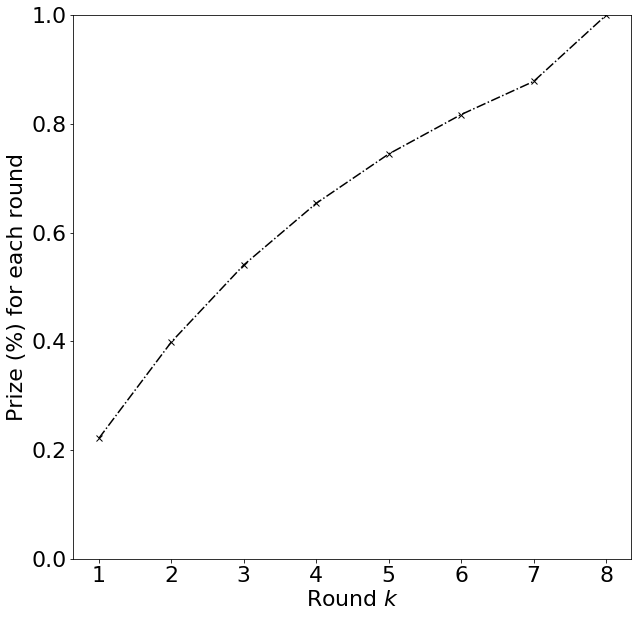

x [0.22151927 0.17721541 0.14177233 0.11341787 0.09073429 0.07258743
 0.0609178  0.1218356 ]
fun -0.22151926774591169
nit 23
status 0
slack [0.         0.08860771 0.1281644  0.         0.         0.
 0.         0.         0.         0.00284785 0.02215193 0.01772154
 0.01417723 0.01134179 0.00907343 0.01827534 0.         0.        ]
message Optimization terminated successfully.
success True
[0.21286962 0.1702957  0.13623656 0.10898925 0.0871914  0.07686959
 0.06918263 0.13836526]


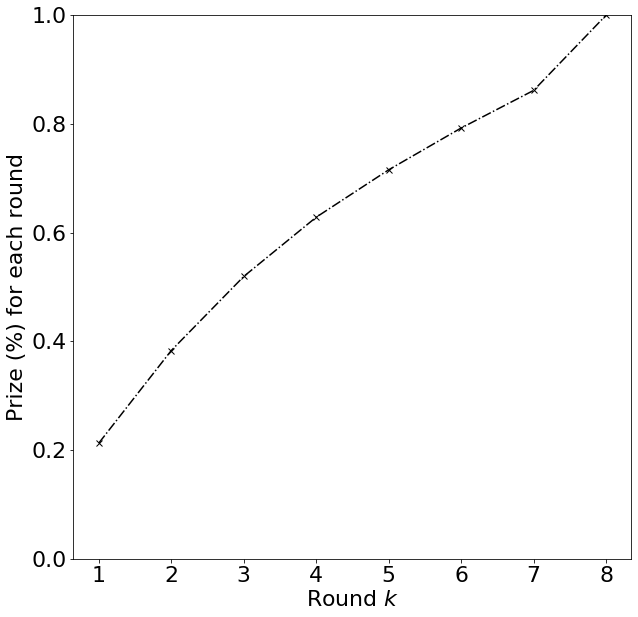

x [0.21286962 0.1702957  0.13623656 0.10898925 0.0871914  0.07686959
 0.06918263 0.13836526]
fun -0.21286962445068025
nit 22
status 0
slack [0.         0.06386089 0.11163474 0.         0.         0.
 0.         0.         0.00711647 0.00768696 0.02128696 0.01702957
 0.01362366 0.01089892 0.00160267 0.02075479 0.         0.        ]
message Optimization terminated successfully.
success True
[0.20165222 0.16132178 0.12905742 0.10373057 0.09335751 0.08402176
 0.07561958 0.15123917]


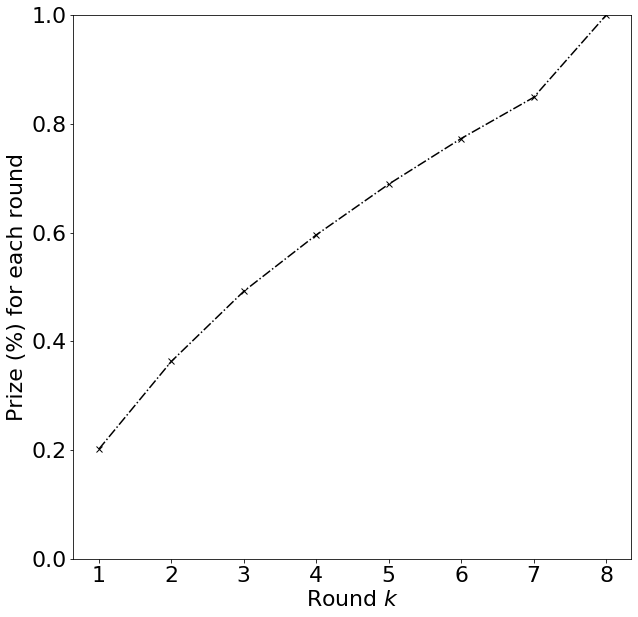

x [0.20165222 0.16132178 0.12905742 0.10373057 0.09335751 0.08402176
 0.07561958 0.15123917]
fun -0.2016522204564989
nit 20
status 0
slack [0.         0.04033044 0.09876083 0.         0.         0.
 0.00048463 0.01037306 0.00933575 0.00840218 0.02016522 0.01613218
 0.01242111 0.         0.         0.02268587 0.         0.        ]
message Optimization terminated successfully.
success True
[0.1885842  0.15086736 0.12215864 0.10994278 0.0989485  0.08905365
 0.08014829 0.16029657]


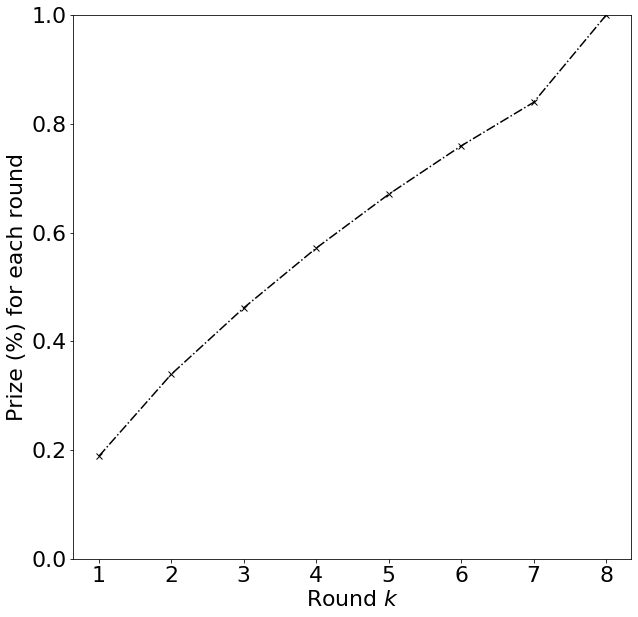

x [0.1885842  0.15086736 0.12215864 0.10994278 0.0989485  0.08905365
 0.08014829 0.16029657]
fun -0.188584202875328
nit 19
status 0
slack [0.         0.01885842 0.08970343 0.         0.         0.00146475
 0.01221586 0.01099428 0.00989485 0.00890537 0.01885842 0.01362198
 0.         0.         0.         0.02404449 0.         0.        ]
message Optimization terminated successfully.
success True
[0.17485065 0.14065278 0.1265875  0.11392875 0.10253587 0.09228229
 0.08305406 0.16610811]


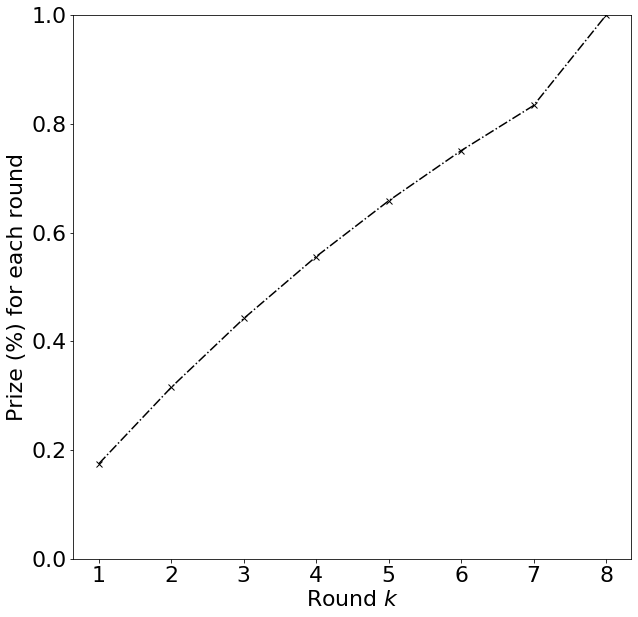

x [0.17485065 0.14065278 0.1265875  0.11392875 0.10253587 0.09228229
 0.08305406 0.16610811]
fun -0.17485064711010737
nit 18
status 0
slack [0.         0.         0.08389189 0.         0.00077226 0.01406528
 0.01265875 0.01139287 0.01025359 0.00922823 0.01671281 0.
 0.         0.         0.         0.02491622 0.         0.        ]
message Optimization terminated successfully.
success True


In [10]:

sols = []
for values in [0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95]:
    s = tennis_model(alpha1 = values, alpha2 = 0.95, lambda1 = 0.1, lambda2 = 0.25, gamma = 0.8, nu = 0.9, beta = 1.7)
    sols.append(s)

In [11]:
sols

[array([0.22742423, 0.18193939, 0.14555151, 0.11644121, 0.09315297,
        0.07452237, 0.0596179 , 0.10135043]),
 array([0.22742423, 0.18193939, 0.14555151, 0.11644121, 0.09315297,
        0.07452237, 0.0596179 , 0.10135043]),
 array([0.22742423, 0.18193939, 0.14555151, 0.11644121, 0.09315297,
        0.07452237, 0.0596179 , 0.10135043]),
 array([0.2271992 , 0.18175936, 0.14540749, 0.11632599, 0.09306079,
        0.07444863, 0.05955891, 0.10223964]),
 array([0.22151927, 0.17721541, 0.14177233, 0.11341787, 0.09073429,
        0.07258743, 0.0609178 , 0.1218356 ]),
 array([0.21286962, 0.1702957 , 0.13623656, 0.10898925, 0.0871914 ,
        0.07686959, 0.06918263, 0.13836526]),
 array([0.20165222, 0.16132178, 0.12905742, 0.10373057, 0.09335751,
        0.08402176, 0.07561958, 0.15123917]),
 array([0.1885842 , 0.15086736, 0.12215864, 0.10994278, 0.0989485 ,
        0.08905365, 0.08014829, 0.16029657]),
 array([0.17485065, 0.14065278, 0.1265875 , 0.11392875, 0.10253587,
        0.09228229, 

[0.22742423 0.18193939 0.14555151 0.11644121 0.09315297 0.07452237
 0.0596179  0.10135043]
[0.22742423 0.18193939 0.14555151 0.11644121 0.09315297 0.07452237
 0.0596179  0.10135043]
[0.22742423 0.18193939 0.14555151 0.11644121 0.09315297 0.07452237
 0.0596179  0.10135043]
[0.2271992  0.18175936 0.14540749 0.11632599 0.09306079 0.07444863
 0.05955891 0.10223964]
[0.22151927 0.17721541 0.14177233 0.11341787 0.09073429 0.07258743
 0.0609178  0.1218356 ]
[0.21286962 0.1702957  0.13623656 0.10898925 0.0871914  0.07686959
 0.06918263 0.13836526]
[0.20165222 0.16132178 0.12905742 0.10373057 0.09335751 0.08402176
 0.07561958 0.15123917]
[0.1885842  0.15086736 0.12215864 0.10994278 0.0989485  0.08905365
 0.08014829 0.16029657]
[0.17485065 0.14065278 0.1265875  0.11392875 0.10253587 0.09228229
 0.08305406 0.16610811]


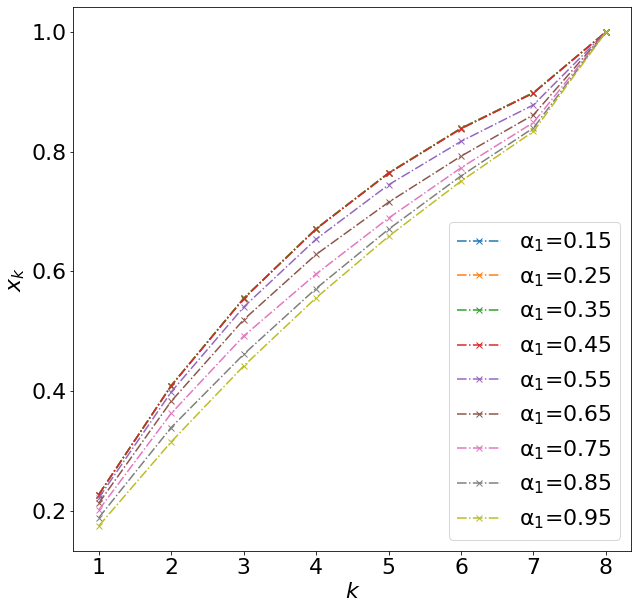

In [12]:
greek_letterz=[chr(code) for code in range(945,970)]
plt.figure(figsize=(10,10))
x = [i for i in range(1,9)]
alpha1 = [0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95]
i = 0
for s in sols:
    print(s)
    plt.plot(x, pd.DataFrame(s, columns=['prize per round'])['prize per round'].cumsum(),'x-.', label=str(greek_letterz[0])+"$_1$="+str(alpha1[i]))
    i = i +1
plt.legend()
plt.xlabel('$k$')
plt.ylabel('$x_k$')
#plt.title(r'$\alpha > \beta$')
plt.show()

[0.20165222 0.16132178 0.12905742 0.10373057 0.09335751 0.08402176
 0.07561958 0.15123917]


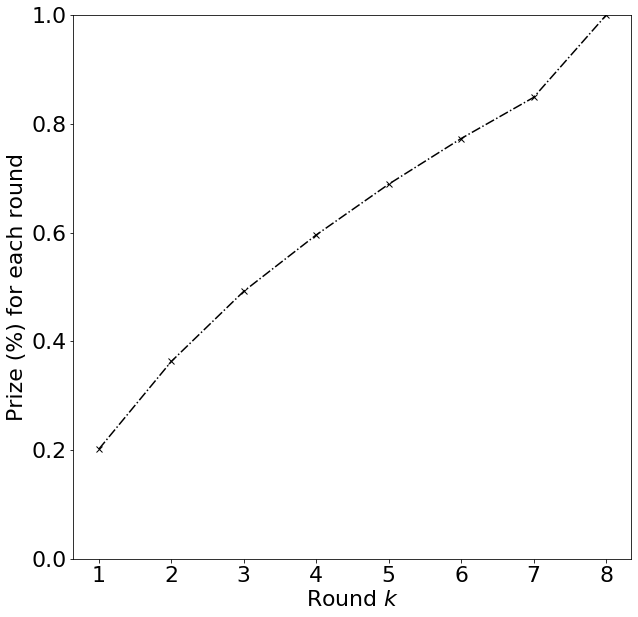

x [0.20165222 0.16132178 0.12905742 0.10373057 0.09335751 0.08402176
 0.07561958 0.15123917]
fun -0.20165222045649744
nit 16
status 0
slack [0.         0.02016522 0.09876083 0.         0.         0.
 0.00048463 0.01037306 0.00933575 0.00840218 0.01613218 0.
 0.01242111 0.         0.         0.02268587 0.         0.        ]
message Optimization terminated successfully.
success True
[0.20165222 0.16132178 0.12905742 0.10373057 0.09335751 0.08402176
 0.07561958 0.15123917]


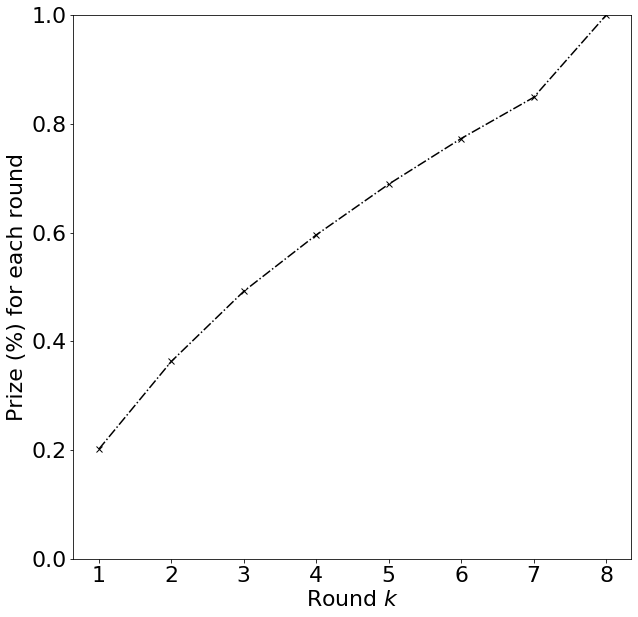

x [0.20165222 0.16132178 0.12905742 0.10373057 0.09335751 0.08402176
 0.07561958 0.15123917]
fun -0.2016522204564989
nit 20
status 0
slack [0.         0.04033044 0.09876083 0.         0.         0.
 0.00048463 0.01037306 0.00933575 0.00840218 0.02016522 0.01613218
 0.01242111 0.         0.         0.02268587 0.         0.        ]
message Optimization terminated successfully.
success True
[0.20165222 0.16132178 0.12905742 0.10373057 0.09335751 0.08402176
 0.07561958 0.15123917]


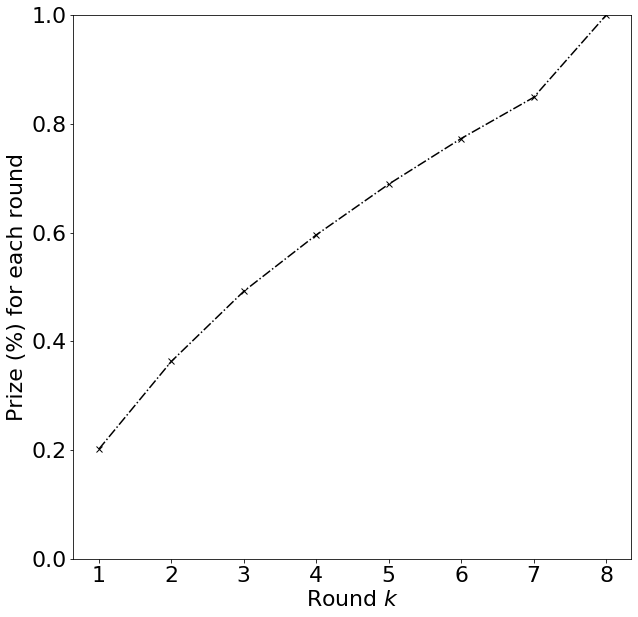

x [0.20165222 0.16132178 0.12905742 0.10373057 0.09335751 0.08402176
 0.07561958 0.15123917]
fun -0.2016522204564974
nit 20
status 0
slack [0.         0.06049567 0.09876083 0.         0.         0.
 0.00048463 0.01037306 0.00933575 0.00840218 0.02016522 0.01613218
 0.01242111 0.         0.         0.02268587 0.         0.        ]
message Optimization terminated successfully.
success True
[0.20165222 0.16132178 0.12905742 0.10373057 0.09335751 0.08402176
 0.07561958 0.15123917]


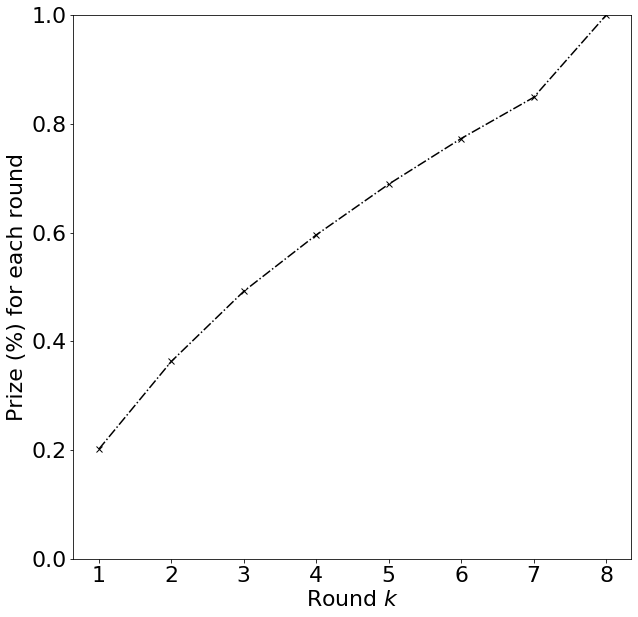

x [0.20165222 0.16132178 0.12905742 0.10373057 0.09335751 0.08402176
 0.07561958 0.15123917]
fun -0.20165222045649764
nit 23
status 0
slack [0.         0.08066089 0.09876083 0.         0.         0.
 0.00048463 0.01037306 0.00933575 0.00840218 0.02016522 0.01613218
 0.01242111 0.         0.         0.02268587 0.         0.        ]
message Optimization terminated successfully.
success True
[0.20165222 0.16132178 0.12905742 0.10373057 0.09335751 0.08402176
 0.07561958 0.15123917]


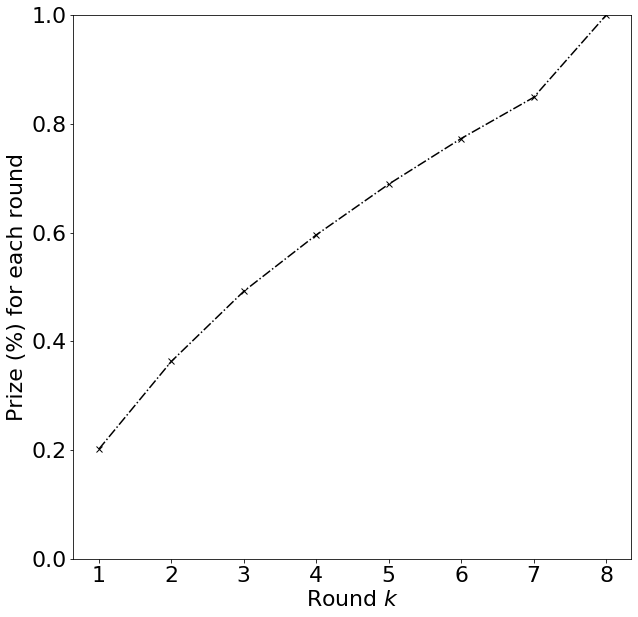

x [0.20165222 0.16132178 0.12905742 0.10373057 0.09335751 0.08402176
 0.07561958 0.15123917]
fun -0.20165222045649744
nit 23
status 0
slack [0.         0.10082611 0.09876083 0.         0.         0.
 0.00048463 0.01037306 0.00933575 0.00840218 0.02016522 0.01613218
 0.01242111 0.         0.         0.02268587 0.         0.        ]
message Optimization terminated successfully.
success True
[0.20165222 0.16132178 0.12905742 0.10373057 0.09335751 0.08402176
 0.07561958 0.15123917]


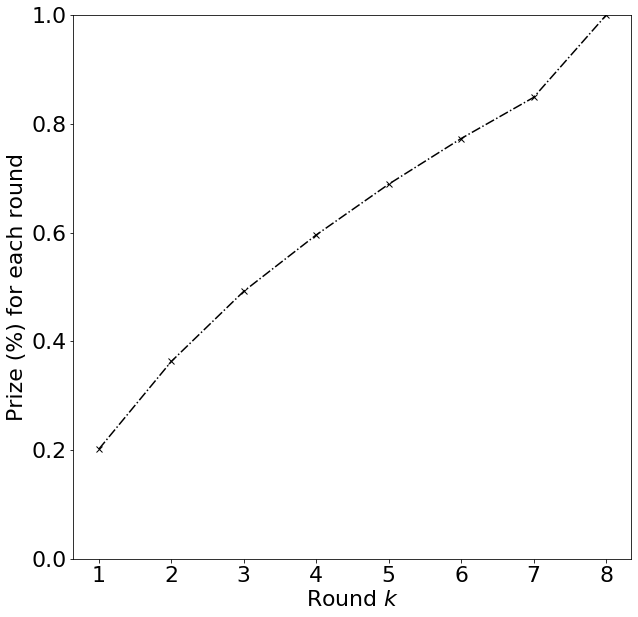

x [0.20165222 0.16132178 0.12905742 0.10373057 0.09335751 0.08402176
 0.07561958 0.15123917]
fun -0.2016522204564975
nit 23
status 0
slack [0.         0.12099133 0.09876083 0.         0.         0.
 0.00048463 0.01037306 0.00933575 0.00840218 0.02016522 0.01613218
 0.01242111 0.         0.         0.02268587 0.         0.        ]
message Optimization terminated successfully.
success True
[0.20165222 0.16132178 0.12905742 0.10373057 0.09335751 0.08402176
 0.07561958 0.15123917]
[0.20165222 0.16132178 0.12905742 0.10373057 0.09335751 0.08402176
 0.07561958 0.15123917]
[0.20165222 0.16132178 0.12905742 0.10373057 0.09335751 0.08402176
 0.07561958 0.15123917]
[0.20165222 0.16132178 0.12905742 0.10373057 0.09335751 0.08402176
 0.07561958 0.15123917]
[0.20165222 0.16132178 0.12905742 0.10373057 0.09335751 0.08402176
 0.07561958 0.15123917]
[0.20165222 0.16132178 0.12905742 0.10373057 0.09335751 0.08402176
 0.07561958 0.15123917]


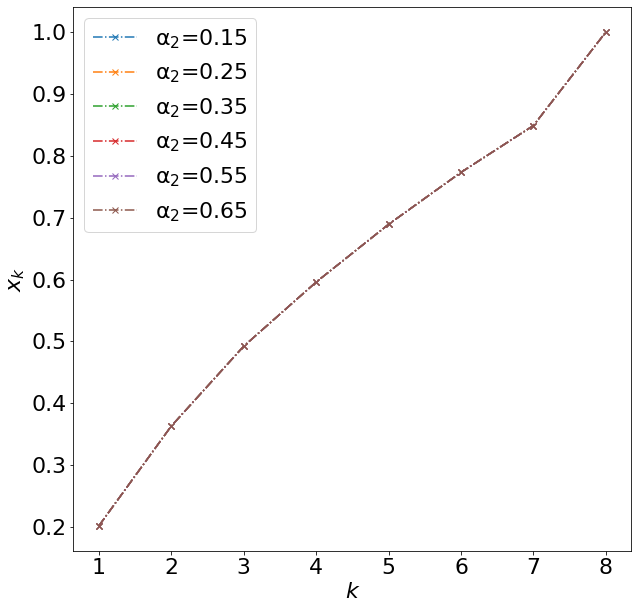

In [13]:
sols = []
for values in [0.85, 0.95, 1.05, 1.15, 1.25, 1.35]:
    s = tennis_model(alpha1 = 0.75, alpha2 = values, lambda1 = 0.1, lambda2 = 0.25, gamma = 0.8, nu = 0.9, beta = 1.7)
    sols.append(s)
    
plt.figure(figsize=(10,10))

x = [i for i in range(1,9)]

alpha2 = [0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95]
i = 0
for s in sols:
    print(s)
    plt.plot(x, pd.DataFrame(s, columns=['prize per round'])['prize per round'].cumsum(),'x-.', label=str(greek_letterz[0])+"$_2$="+str(alpha2[i]))
    i = i +1
plt.legend()
plt.xlabel('$k$')
plt.ylabel('$x_k$')
#plt.title(r'$\alpha > \beta$')
plt.show()

[0.20165222 0.16132178 0.12905742 0.10373057 0.09335751 0.08402176
 0.07561958 0.15123917]


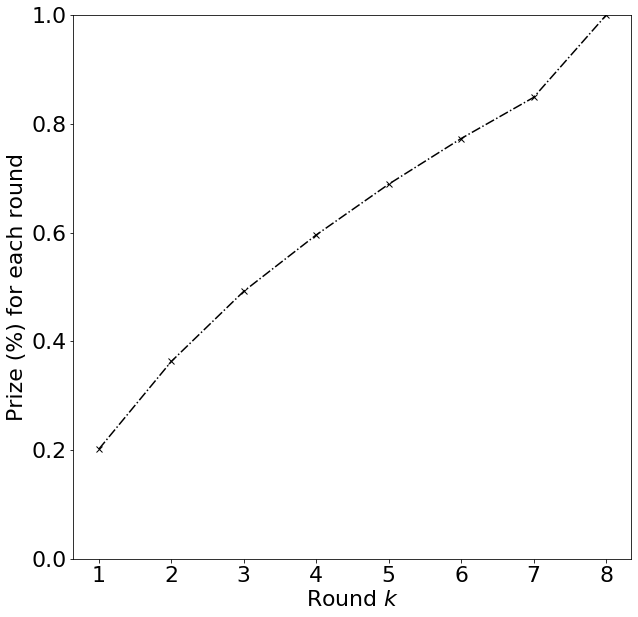

x [0.20165222 0.16132178 0.12905742 0.10373057 0.09335751 0.08402176
 0.07561958 0.15123917]
fun -0.2016522204564989
nit 20
status 0
slack [0.         0.04033044 0.09876083 0.         0.         0.
 0.00048463 0.01037306 0.00933575 0.00840218 0.02016522 0.01613218
 0.01242111 0.         0.         0.02268587 0.         0.        ]
message Optimization terminated successfully.
success True
[0.20165222 0.16132178 0.12905742 0.10373057 0.09335751 0.08402176
 0.07561958 0.15123917]


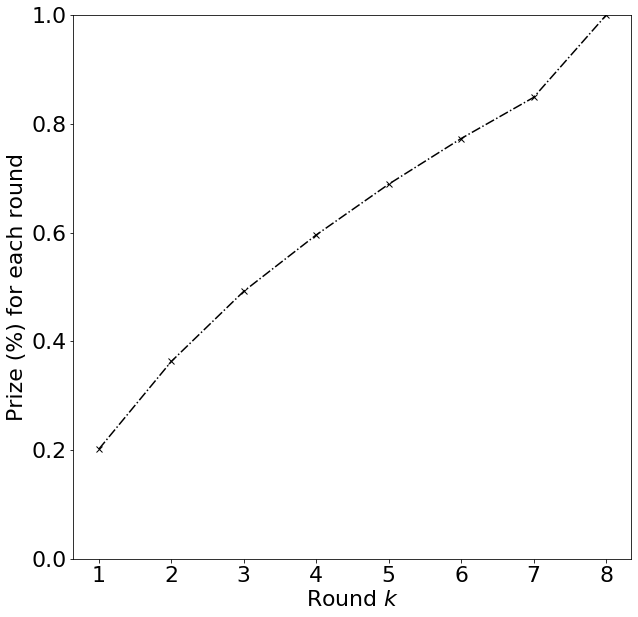

x [0.20165222 0.16132178 0.12905742 0.10373057 0.09335751 0.08402176
 0.07561958 0.15123917]
fun -0.20165222045649894
nit 20
status 0
slack [0.         0.04033044 0.09876083 0.         0.         0.
 0.00048463 0.01037306 0.00933575 0.00840218 0.02016522 0.01613218
 0.01242111 0.         0.         0.02268587 0.         0.        ]
message Optimization terminated successfully.
success True
[0.20165222 0.16132178 0.12905742 0.10373057 0.09335751 0.08402176
 0.07561958 0.15123917]


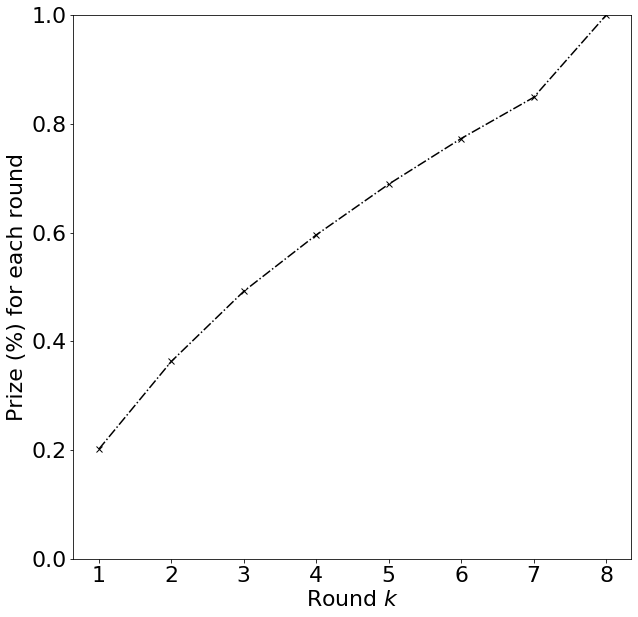

x [0.20165222 0.16132178 0.12905742 0.10373057 0.09335751 0.08402176
 0.07561958 0.15123917]
fun -0.2016522204564989
nit 20
status 0
slack [0.         0.04033044 0.09876083 0.         0.         0.
 0.00048463 0.01037306 0.00933575 0.00840218 0.02016522 0.01613218
 0.01242111 0.         0.         0.02268587 0.         0.        ]
message Optimization terminated successfully.
success True
[0.20165222 0.16132178 0.12905742 0.10373057 0.09335751 0.08402176
 0.07561958 0.15123917]


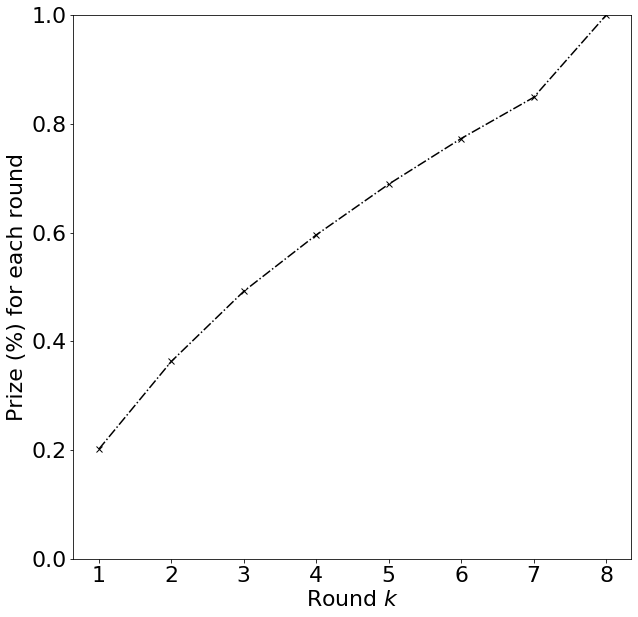

x [0.20165222 0.16132178 0.12905742 0.10373057 0.09335751 0.08402176
 0.07561958 0.15123917]
fun -0.2016522204564989
nit 20
status 0
slack [0.         0.04033044 0.09876083 0.         0.         0.
 0.00048463 0.01037306 0.00933575 0.00840218 0.02016522 0.01613218
 0.01242111 0.         0.         0.02268587 0.         0.        ]
message Optimization terminated successfully.
success True
[0.20165222 0.16132178 0.12905742 0.10373057 0.09335751 0.08402176
 0.07561958 0.15123917]


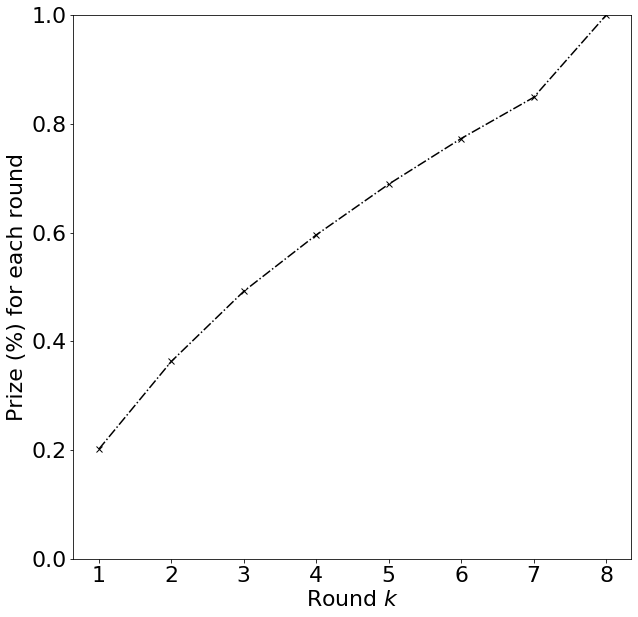

x [0.20165222 0.16132178 0.12905742 0.10373057 0.09335751 0.08402176
 0.07561958 0.15123917]
fun -0.2016522204564989
nit 20
status 0
slack [0.         0.04033044 0.09876083 0.         0.         0.
 0.00048463 0.01037306 0.00933575 0.00840218 0.02016522 0.01613218
 0.01242111 0.         0.         0.02268587 0.         0.        ]
message Optimization terminated successfully.
success True
[0.20165222 0.16132178 0.12905742 0.10373057 0.09335751 0.08402176
 0.07561958 0.15123917]


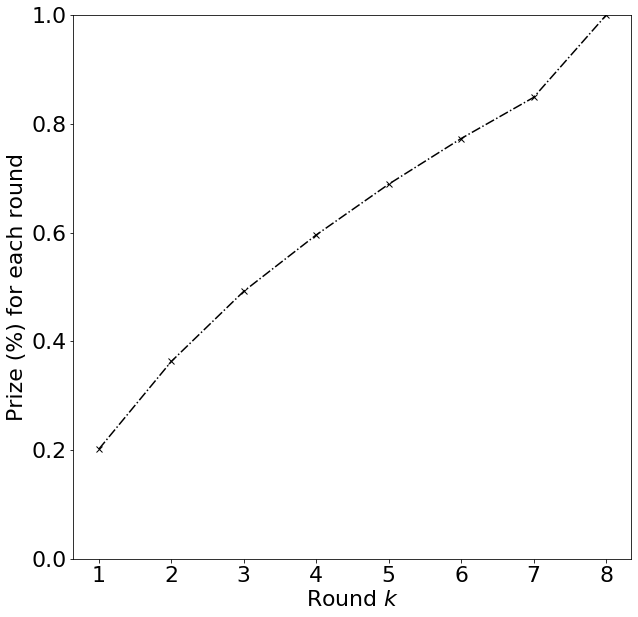

x [0.20165222 0.16132178 0.12905742 0.10373057 0.09335751 0.08402176
 0.07561958 0.15123917]
fun -0.20165222045649894
nit 20
status 0
slack [0.         0.04033044 0.09876083 0.         0.         0.
 0.00048463 0.01037306 0.00933575 0.00840218 0.02016522 0.01613218
 0.01242111 0.         0.         0.02268587 0.         0.        ]
message Optimization terminated successfully.
success True
[0.19647535 0.15718028 0.12574423 0.10631001 0.09567901 0.08611111
 0.0775     0.155     ]


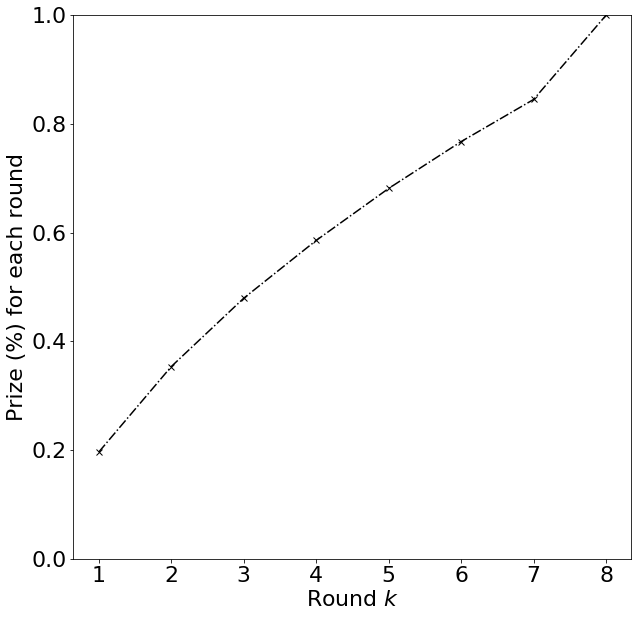

x [0.19647535 0.15718028 0.12574423 0.10631001 0.09567901 0.08611111
 0.0775     0.155     ]
fun -0.1964753536171292
nit 20
status 0
slack [0.00764348 0.03165159 0.095      0.         0.         0.
 0.00571463 0.010631   0.0095679  0.00861111 0.01964754 0.01571803
 0.00685979 0.         0.         0.02325    0.         0.        ]
message Optimization terminated successfully.
success True
[0.18926315 0.15141052 0.12193263 0.10973937 0.09876543 0.08888889
 0.08       0.16      ]


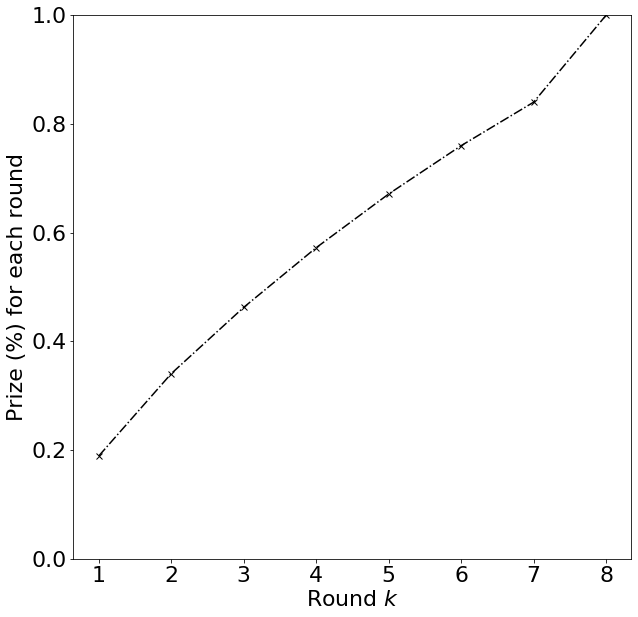

x [0.18926315 0.15141052 0.12193263 0.10973937 0.09876543 0.08888889
 0.08       0.16      ]
fun -0.18926315432945814
nit 17
status 0
slack [0.01805263 0.0198     0.09       0.         0.         0.00080421
 0.01219326 0.01097394 0.00987654 0.00888889 0.         0.01433684
 0.         0.         0.         0.024      0.         0.        ]
message Optimization terminated successfully.
success True
[0.20165222 0.16132178 0.12905742 0.10373057 0.09335751 0.08402176
 0.07561958 0.15123917]
[0.20165222 0.16132178 0.12905742 0.10373057 0.09335751 0.08402176
 0.07561958 0.15123917]
[0.20165222 0.16132178 0.12905742 0.10373057 0.09335751 0.08402176
 0.07561958 0.15123917]
[0.20165222 0.16132178 0.12905742 0.10373057 0.09335751 0.08402176
 0.07561958 0.15123917]
[0.20165222 0.16132178 0.12905742 0.10373057 0.09335751 0.08402176
 0.07561958 0.15123917]
[0.20165222 0.16132178 0.12905742 0.10373057 0.09335751 0.08402176
 0.07561958 0.15123917]
[0.19647535 0.15718028 0.12574423 0.10631001 0.095679

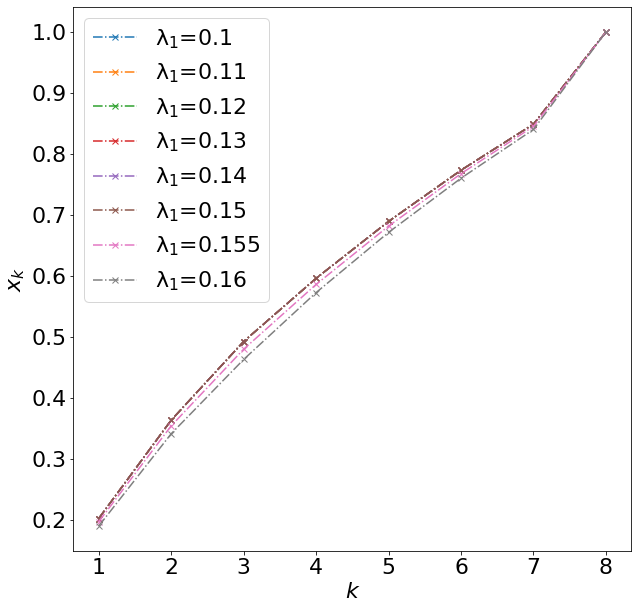

In [14]:
sols = []
lambda1 = [0.1, 0.11, 0.12, 0.13, 0.14, 0.15,0.155, 0.16]
for values in lambda1:
    s = tennis_model(alpha1 = 0.75, alpha2 = 0.95, lambda1 = values, lambda2 = 0.25, gamma = 0.8, nu = 0.9, beta = 1.7)
    sols.append(s)
plt.figure(figsize=(10,10))
x = [i for i in range(1,9)]
i = 0
for s in sols:
    print(s)
    plt.plot(x, pd.DataFrame(s, columns=['prize per round'])['prize per round'].cumsum(),'x-.', label=str(greek_letterz[10])+"$_1$="+str(lambda1[i]))
    i = i +1
plt.legend()
plt.xlabel('$k$')
plt.ylabel('$x_k$')
#plt.title(r'$\alpha > \beta$')
plt.show()

[0.17333333 0.15520248 0.13968223 0.12571401 0.11314261 0.09051408
 0.07241127 0.13      ]


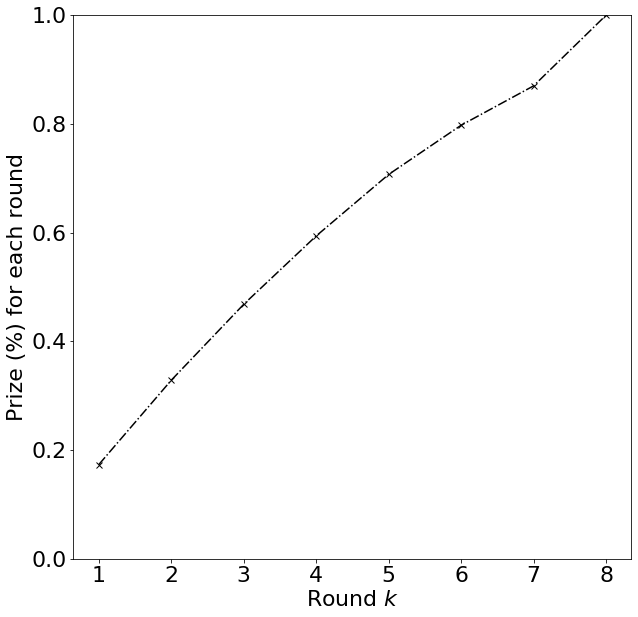

x [0.17333333 0.15520248 0.13968223 0.12571401 0.11314261 0.09051408
 0.07241127 0.13      ]
fun -0.17333333333333245
nit 20
status 0
slack [0.         0.03466667 0.03       0.         0.01653581 0.01552025
 0.01396822 0.0125714  0.         0.         0.00079752 0.
 0.         0.         0.01131426 0.00690085 0.         0.01482253]
message Optimization terminated successfully.
success True
[0.18666667 0.15000083 0.13500075 0.12150067 0.1093506  0.08748048
 0.07       0.14      ]


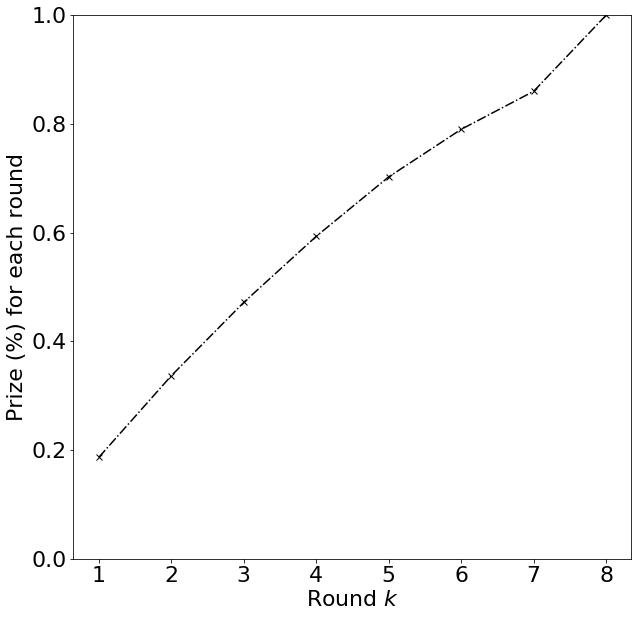

x [0.18666667 0.15000083 0.13500075 0.12150067 0.1093506  0.08748048
 0.07       0.14      ]
fun -0.18666666666666587
nit 21
status 0
slack [0.00000000e+00 3.73333333e-02 4.00000000e-02 0.00000000e+00
 6.67495401e-04 1.50000829e-02 1.35000746e-02 1.21500671e-02
 0.00000000e+00 1.56133459e-05 1.79991713e-02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.09350604e-02 2.10000000e-02
 0.00000000e+00 0.00000000e+00]
message Optimization terminated successfully.
success True
[0.2        0.16       0.128      0.10590406 0.09531365 0.08578229
 0.075      0.15      ]


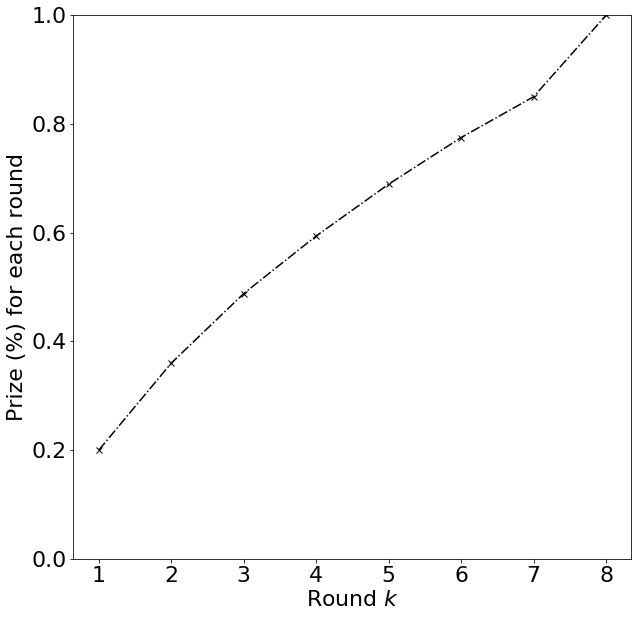

x [0.2        0.16       0.128      0.10590406 0.09531365 0.08578229
 0.075      0.15      ]
fun -0.19999999999999998
nit 22
status 0
slack [0.         0.04       0.05       0.         0.         0.
 0.00350406 0.01059041 0.00953137 0.00637417 0.02       0.016
 0.00929594 0.         0.         0.0225     0.         0.        ]
message Optimization terminated successfully.
success True
[0.20165222 0.16132178 0.12905742 0.10373057 0.09335751 0.08402176
 0.07561958 0.15123917]


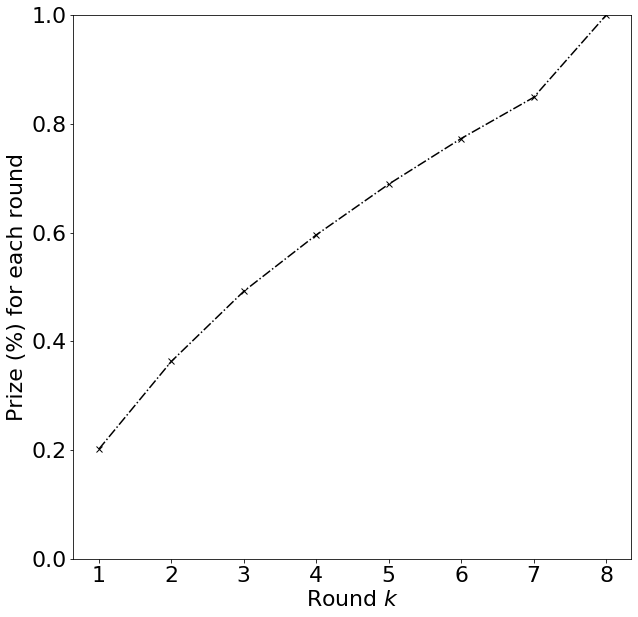

x [0.20165222 0.16132178 0.12905742 0.10373057 0.09335751 0.08402176
 0.07561958 0.15123917]
fun -0.2016522204564989
nit 21
status 0
slack [0.         0.04033044 0.05123917 0.00876083 0.         0.
 0.00048463 0.01037306 0.00933575 0.00840218 0.02016522 0.01613218
 0.01242111 0.         0.         0.02268587 0.         0.        ]
message Optimization terminated successfully.
success True
[0.20165222 0.16132178 0.12905742 0.10373057 0.09335751 0.08402176
 0.07561958 0.15123917]


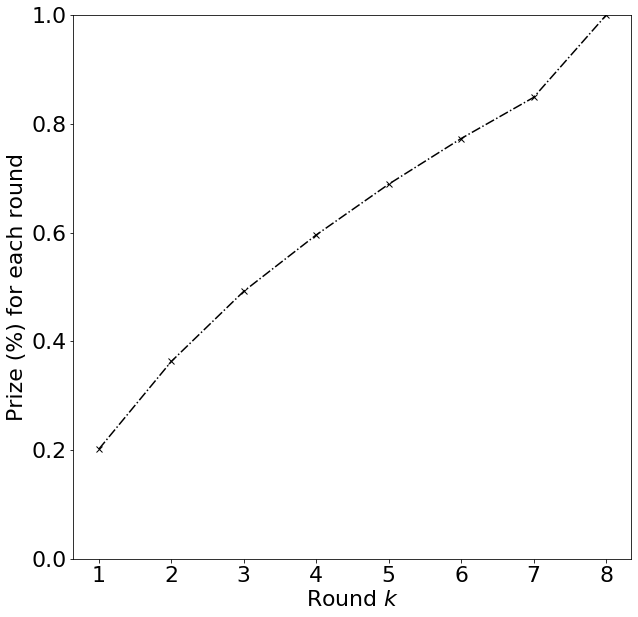

x [0.20165222 0.16132178 0.12905742 0.10373057 0.09335751 0.08402176
 0.07561958 0.15123917]
fun -0.2016522204564989
nit 20
status 0
slack [0.         0.04033044 0.04876083 0.         0.         0.
 0.00048463 0.01037306 0.00933575 0.00840218 0.02016522 0.01613218
 0.01242111 0.         0.         0.02268587 0.         0.        ]
message Optimization terminated successfully.
success True
[0.20165222 0.16132178 0.12905742 0.10373057 0.09335751 0.08402176
 0.07561958 0.15123917]


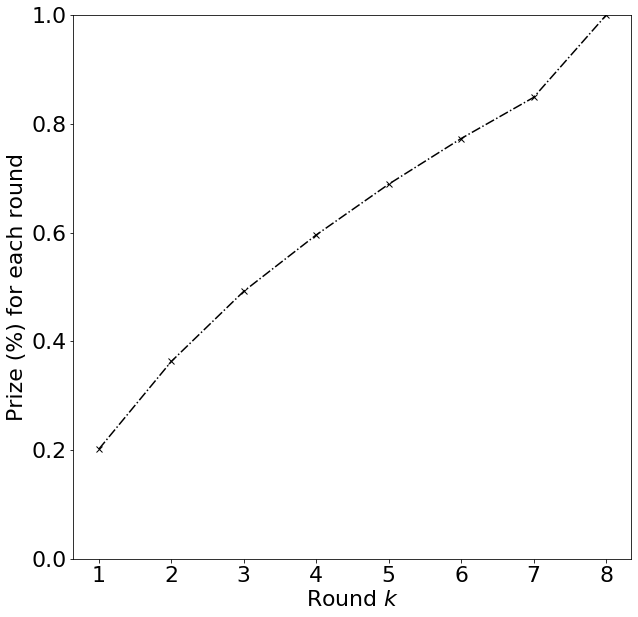

x [0.20165222 0.16132178 0.12905742 0.10373057 0.09335751 0.08402176
 0.07561958 0.15123917]
fun -0.2016522204564989
nit 20
status 0
slack [0.         0.04033044 0.14876083 0.         0.         0.
 0.00048463 0.01037306 0.00933575 0.00840218 0.02016522 0.01613218
 0.01242111 0.         0.         0.02268587 0.         0.        ]
message Optimization terminated successfully.
success True
[0.17333333 0.15520248 0.13968223 0.12571401 0.11314261 0.09051408
 0.07241127 0.13      ]
[0.18666667 0.15000083 0.13500075 0.12150067 0.1093506  0.08748048
 0.07       0.14      ]
[0.2        0.16       0.128      0.10590406 0.09531365 0.08578229
 0.075      0.15      ]
[0.20165222 0.16132178 0.12905742 0.10373057 0.09335751 0.08402176
 0.07561958 0.15123917]
[0.20165222 0.16132178 0.12905742 0.10373057 0.09335751 0.08402176
 0.07561958 0.15123917]
[0.20165222 0.16132178 0.12905742 0.10373057 0.09335751 0.08402176
 0.07561958 0.15123917]


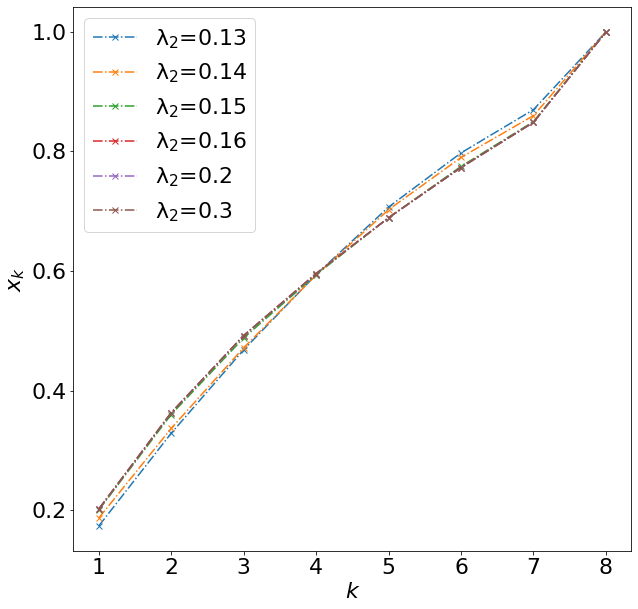

In [15]:
sols = []
lambda2 = [0.13, 0.14, 0.15,0.16, 0.2, 0.3]
for values in lambda2:
    s = tennis_model(alpha1 = 0.75, alpha2 = 0.95, lambda1 = 0.1, lambda2 = values, gamma = 0.8, nu = 0.9, beta = 1.7)
    sols.append(s)
plt.figure(figsize=(10,10))
x = [i for i in range(1,9)]
i = 0
for s in sols:
    print(s)
    plt.plot(x, pd.DataFrame(s, columns=['prize per round'])['prize per round'].cumsum(),'x-.', label=str(greek_letterz[10])+"$_2$="+str(lambda2[i]))
    i = i +1
plt.legend()
plt.xlabel('$k$')
plt.ylabel('$x_k$')
#plt.title(r'$\alpha > \beta$')
plt.show()

In [16]:


print(greek_letterz)

['α', 'β', 'γ', 'δ', 'ε', 'ζ', 'η', 'θ', 'ι', 'κ', 'λ', 'μ', 'ν', 'ξ', 'ο', 'π', 'ρ', 'ς', 'σ', 'τ', 'υ', 'φ', 'χ', 'ψ', 'ω']


[0.21161075 0.13438675 0.12094807 0.10885326 0.09796794 0.08817114
 0.07935403 0.15870806]


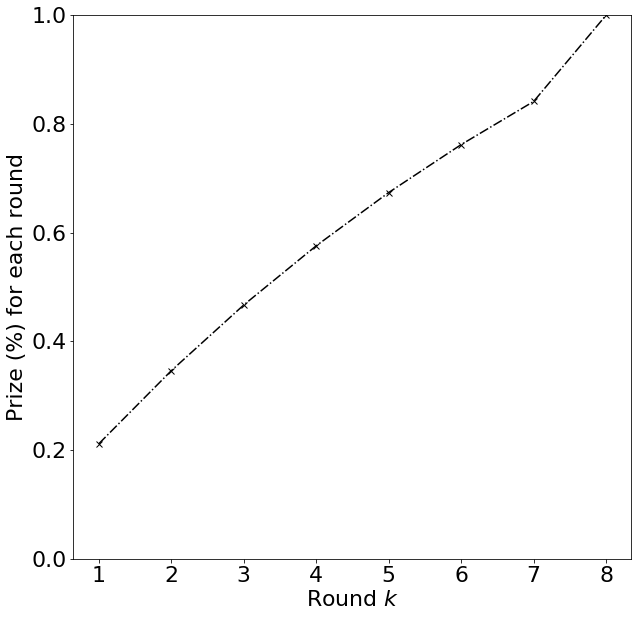

x [0.21161075 0.13438675 0.12094807 0.10885326 0.09796794 0.08817114
 0.07935403 0.15870806]
fun -0.21161074610177677
nit 18
status 0
slack [0.         0.04232215 0.04129194 0.         0.02858137 0.0537547
 0.04837923 0.04354131 0.03918718 0.03526846 0.05606293 0.
 0.         0.         0.         0.02380621 0.         0.        ]
message Optimization terminated successfully.
success True
[0.21161075 0.13438675 0.12094807 0.10885326 0.09796794 0.08817114
 0.07935403 0.15870806]


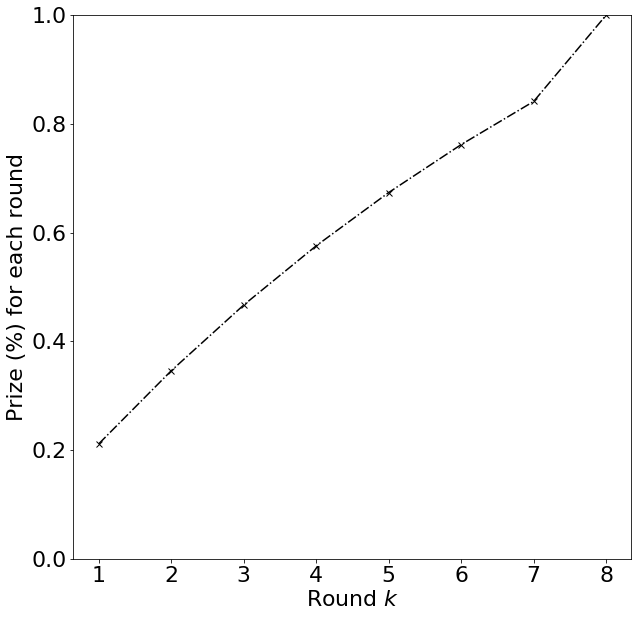

x [0.21161075 0.13438675 0.12094807 0.10885326 0.09796794 0.08817114
 0.07935403 0.15870806]
fun -0.21161074610177633
nit 18
status 0
slack [0.         0.04232215 0.04129194 0.         0.0074203  0.04031602
 0.03628442 0.03265598 0.02939038 0.02645134 0.05606293 0.
 0.         0.         0.         0.02380621 0.         0.        ]
message Optimization terminated successfully.
success True
[0.20874246 0.14611972 0.11930868 0.10737781 0.09664003 0.08697603
 0.07827842 0.15655685]


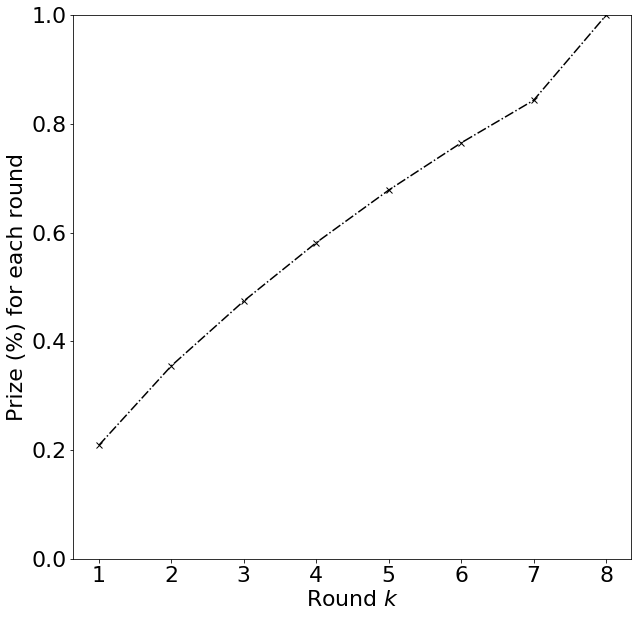

x [0.20874246 0.14611972 0.11930868 0.10737781 0.09664003 0.08697603
 0.07827842 0.15655685]
fun -0.20874246267428018
nit 19
status 0
slack [0.         0.04174849 0.04344315 0.         0.         0.01702487
 0.02386174 0.02147556 0.01932801 0.01739521 0.04174849 0.01219907
 0.         0.         0.         0.02348353 0.         0.        ]
message Optimization terminated successfully.
success True
[0.20165222 0.16132178 0.12905742 0.10373057 0.09335751 0.08402176
 0.07561958 0.15123917]


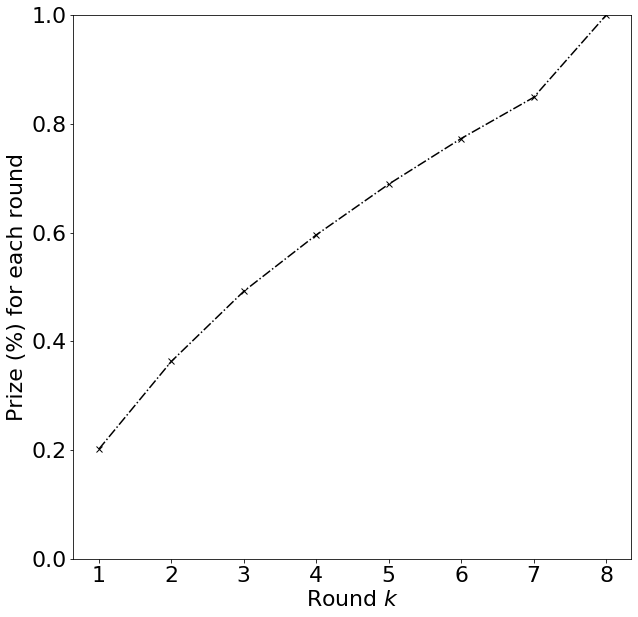

x [0.20165222 0.16132178 0.12905742 0.10373057 0.09335751 0.08402176
 0.07561958 0.15123917]
fun -0.2016522204564989
nit 20
status 0
slack [0.         0.04033044 0.04876083 0.         0.         0.
 0.00048463 0.01037306 0.00933575 0.00840218 0.02016522 0.01613218
 0.01242111 0.         0.         0.02268587 0.         0.        ]
message Optimization terminated successfully.
success True
[0.16338586 0.14704727 0.13234255 0.11910829 0.10719746 0.09647772
 0.08682994 0.14761091]


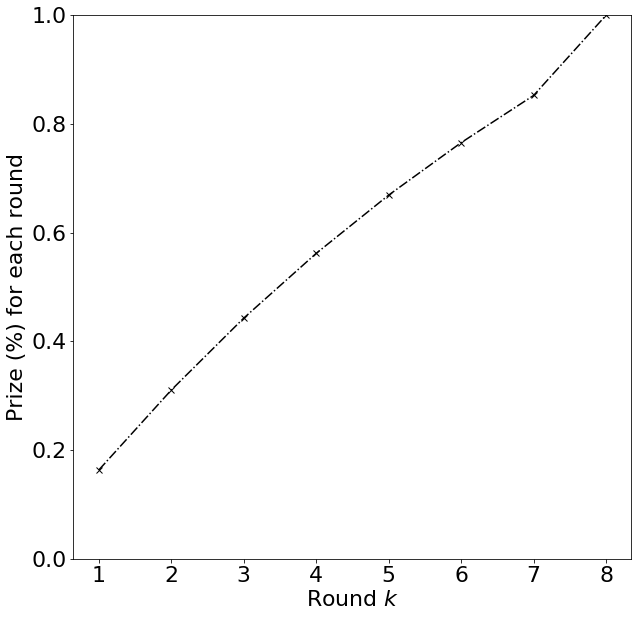

x [0.16338586 0.14704727 0.13234255 0.11910829 0.10719746 0.09647772
 0.08682994 0.14761091]
fun -0.1633858595453132
nit 10
status 0
slack [0.02507151 0.00760566 0.05238909 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.02604898 0.        ]
message Optimization terminated successfully.
success True
[0.21161075 0.13438675 0.12094807 0.10885326 0.09796794 0.08817114
 0.07935403 0.15870806]
[0.21161075 0.13438675 0.12094807 0.10885326 0.09796794 0.08817114
 0.07935403 0.15870806]
[0.20874246 0.14611972 0.11930868 0.10737781 0.09664003 0.08697603
 0.07827842 0.15655685]
[0.20165222 0.16132178 0.12905742 0.10373057 0.09335751 0.08402176
 0.07561958 0.15123917]
[0.16338586 0.14704727 0.13234255 0.11910829 0.10719746 0.09647772
 0.08682994 0.14761091]


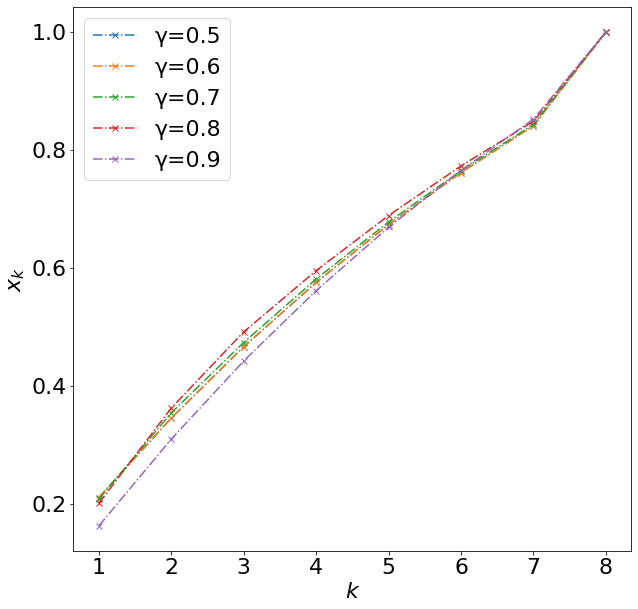

In [17]:
sols = []
gamma = [0.5, 0.6, 0.7,0.8, 0.9]
for values in gamma:
    s = tennis_model(alpha1 = 0.75, alpha2 = 0.95, lambda1 = 0.1, lambda2 = 0.2, gamma = values, nu = 0.9, beta = 1.7)
    sols.append(s)
plt.figure(figsize=(10,10))
x = [i for i in range(1,9)]
i = 0
for s in sols:
    print(s)
    plt.plot(x, pd.DataFrame(s, columns=['prize per round'])['prize per round'].cumsum(),'x-.', label=str(greek_letterz[2])+"="+str(gamma[i]))
    i = i +1
plt.legend()
plt.xlabel('$k$')
plt.ylabel('$x_k$')
#plt.title(r'$\alpha > \beta$')
plt.show()

[0.19013683 0.1606952  0.13659092 0.11610228 0.09868694 0.0838839
 0.07130131 0.14260263]


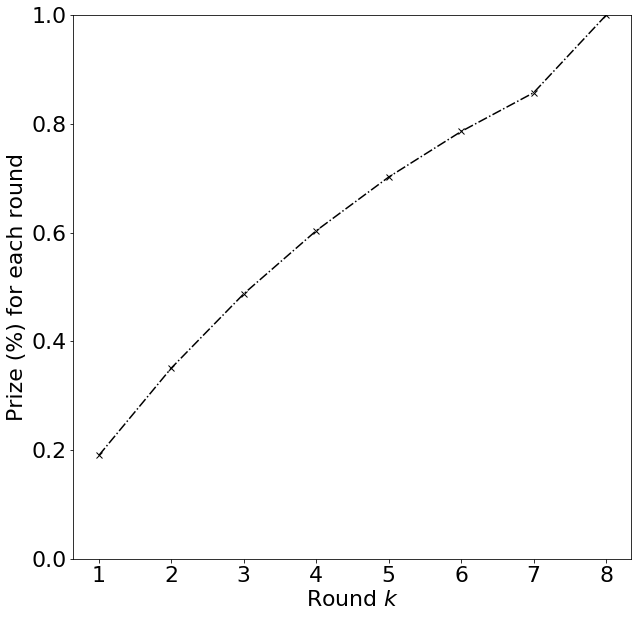

x [0.19013683 0.1606952  0.13659092 0.11610228 0.09868694 0.0838839
 0.07130131 0.14260263]
fun -0.1901368334666629
nit 18
status 0
slack [0.         0.03802737 0.05739737 0.         0.00858573 0.00803476
 0.00682955 0.00580511 0.00493435 0.00419419 0.00092111 0.
 0.         0.         0.         0.02139039 0.         0.        ]
message Optimization terminated successfully.
success True
[0.20165222 0.16132178 0.12905742 0.10373057 0.09335751 0.08402176
 0.07561958 0.15123917]


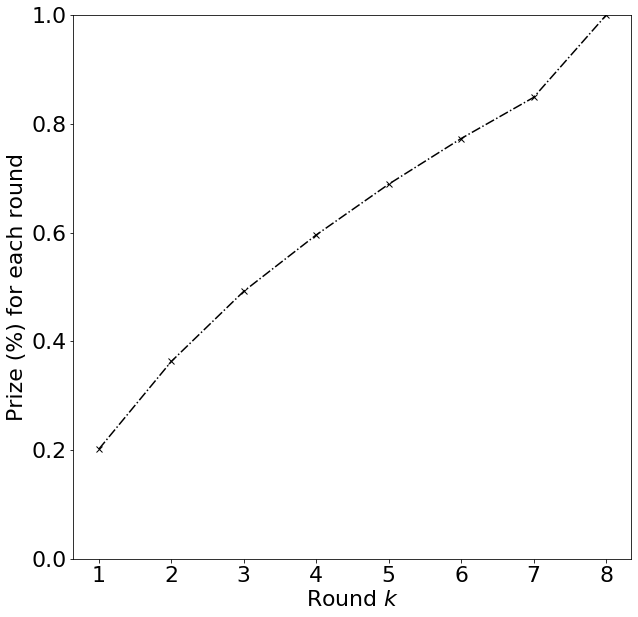

x [0.20165222 0.16132178 0.12905742 0.10373057 0.09335751 0.08402176
 0.07561958 0.15123917]
fun -0.2016522204564989
nit 20
status 0
slack [0.         0.04033044 0.04876083 0.         0.         0.
 0.00048463 0.01037306 0.00933575 0.00840218 0.02016522 0.01613218
 0.01242111 0.         0.         0.02268587 0.         0.        ]
message Optimization terminated successfully.
success True
[0.20461408 0.16369126 0.13095301 0.10476241 0.0850197  0.08076871
 0.07673028 0.15346056]


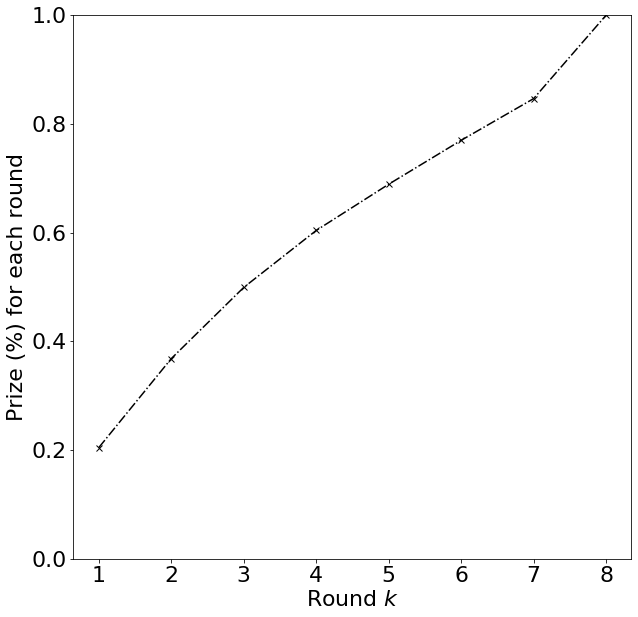

x [0.20461408 0.16369126 0.13095301 0.10476241 0.0850197  0.08076871
 0.07673028 0.15346056]
fun -0.20461407574801743
nit 15
status 0
slack [0.         0.04092282 0.04653944 0.         0.         0.
 0.         0.00120977 0.01275295 0.01211531 0.02455369 0.01964295
 0.         0.01450459 0.         0.02301908 0.         0.        ]
message Optimization terminated successfully.
success True
[0.19013683 0.1606952  0.13659092 0.11610228 0.09868694 0.0838839
 0.07130131 0.14260263]
[0.20165222 0.16132178 0.12905742 0.10373057 0.09335751 0.08402176
 0.07561958 0.15123917]
[0.20461408 0.16369126 0.13095301 0.10476241 0.0850197  0.08076871
 0.07673028 0.15346056]


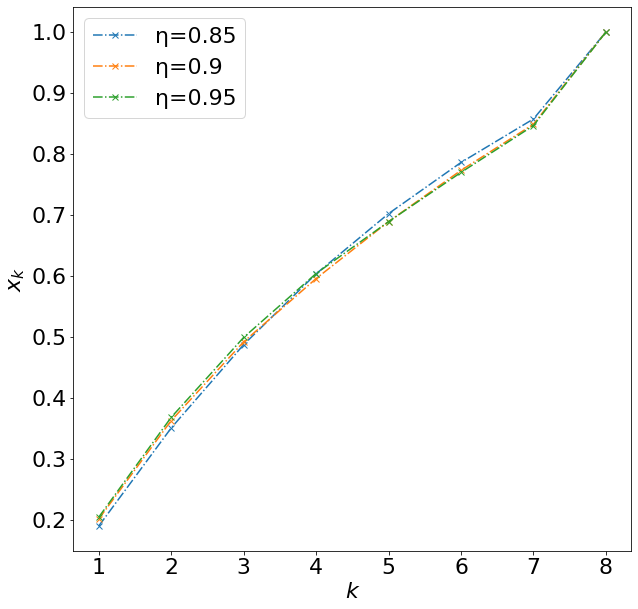

In [18]:
sols = []
nu = [0.85, 0.9, 0.95]
for values in nu:
    s = tennis_model(alpha1 = 0.75, alpha2 = 0.95, lambda1 = 0.1, lambda2 = 0.2, gamma = 0.8, nu = values, beta = 1.7)
    sols.append(s)
plt.figure(figsize=(10,10))
x = [i for i in range(1,9)]
i = 0
for s in sols:
    print(s)
    plt.plot(x, pd.DataFrame(s, columns=['prize per round'])['prize per round'].cumsum(),'x-.', label=str(greek_letterz[6])+"="+str(nu[i]))
    i = i +1
plt.legend()
plt.xlabel('$k$')
plt.ylabel('$x_k$')
#plt.title(r'$\alpha > \beta$')
plt.show()

[0.20165222 0.16132178 0.12905742 0.10373057 0.09335751 0.08402176
 0.07561958 0.15123917]


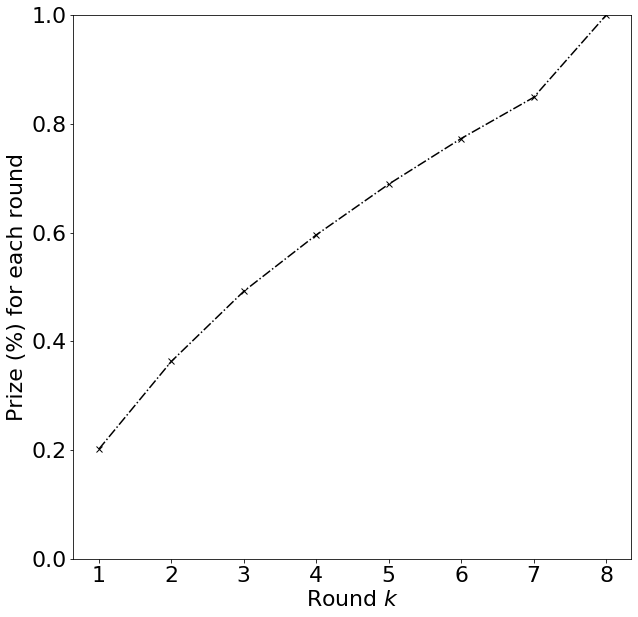

x [0.20165222 0.16132178 0.12905742 0.10373057 0.09335751 0.08402176
 0.07561958 0.15123917]
fun -0.2016522204564989
nit 20
status 0
slack [0.         0.04033044 0.04876083 0.         0.         0.
 0.00048463 0.01037306 0.00933575 0.00840218 0.02016522 0.01613218
 0.01242111 0.         0.         0.14367721 0.         0.        ]
message Optimization terminated successfully.
success True
[0.20165222 0.16132178 0.12905742 0.10373057 0.09335751 0.08402176
 0.07561958 0.15123917]


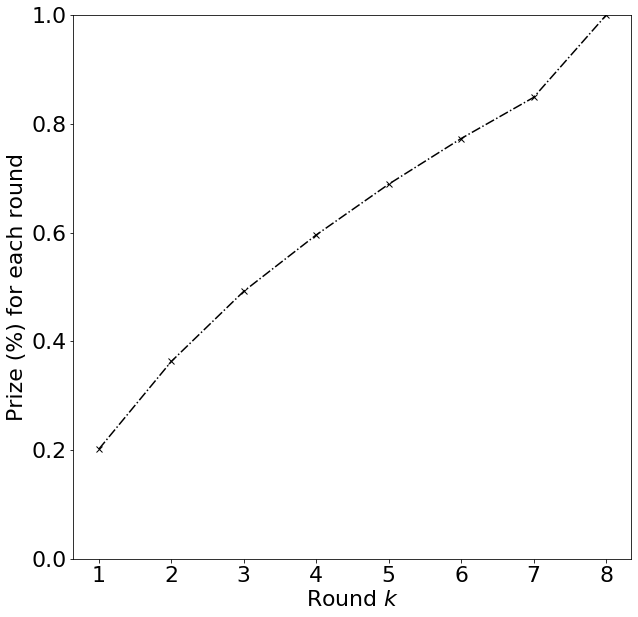

x [0.20165222 0.16132178 0.12905742 0.10373057 0.09335751 0.08402176
 0.07561958 0.15123917]
fun -0.2016522204564989
nit 20
status 0
slack [0.         0.04033044 0.04876083 0.         0.         0.
 0.00048463 0.01037306 0.00933575 0.00840218 0.02016522 0.01613218
 0.01242111 0.         0.         0.03780979 0.         0.        ]
message Optimization terminated successfully.
success True
[0.20165222 0.16132178 0.12905742 0.10373057 0.09335751 0.08402176
 0.07561958 0.15123917]


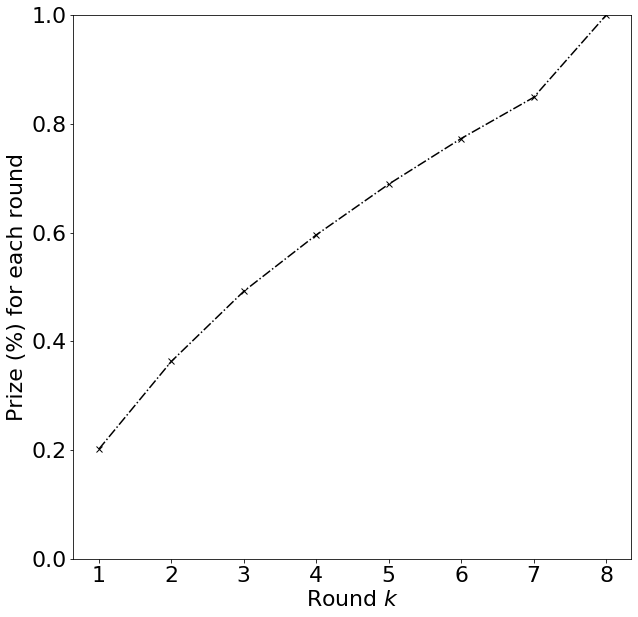

x [0.20165222 0.16132178 0.12905742 0.10373057 0.09335751 0.08402176
 0.07561958 0.15123917]
fun -0.2016522204564989
nit 20
status 0
slack [0.         0.04033044 0.04876083 0.         0.         0.
 0.00048463 0.01037306 0.00933575 0.00840218 0.02016522 0.01613218
 0.01242111 0.         0.         0.03024783 0.         0.        ]
message Optimization terminated successfully.
success True
[0.20165222 0.16132178 0.12905742 0.10373057 0.09335751 0.08402176
 0.07561958 0.15123917]


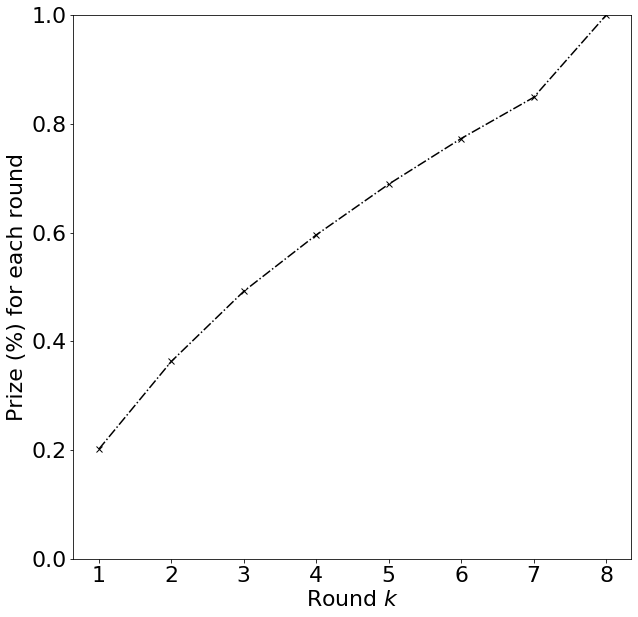

x [0.20165222 0.16132178 0.12905742 0.10373057 0.09335751 0.08402176
 0.07561958 0.15123917]
fun -0.2016522204564989
nit 20
status 0
slack [0.         0.04033044 0.04876083 0.         0.         0.
 0.00048463 0.01037306 0.00933575 0.00840218 0.02016522 0.01613218
 0.01242111 0.         0.         0.02268587 0.         0.        ]
message Optimization terminated successfully.
success True
[0.20165222 0.16132178 0.12905742 0.10373057 0.09335751 0.08402176
 0.07561958 0.15123917]


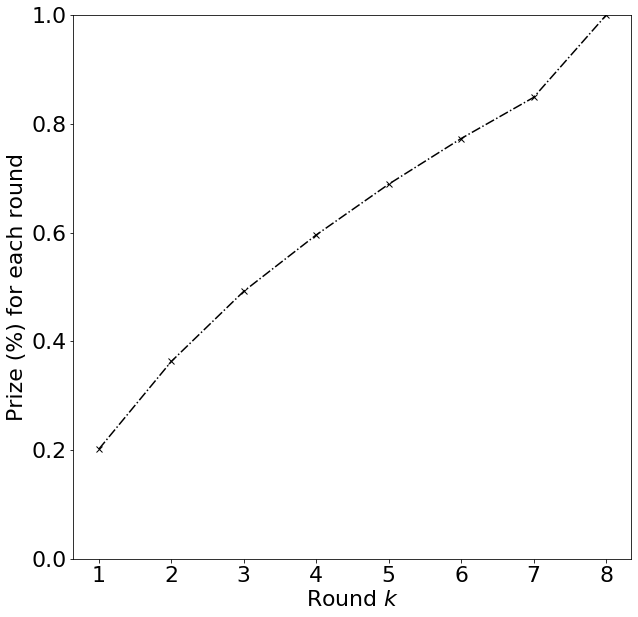

x [0.20165222 0.16132178 0.12905742 0.10373057 0.09335751 0.08402176
 0.07561958 0.15123917]
fun -0.2016522204564989
nit 20
status 0
slack [0.         0.04033044 0.04876083 0.         0.         0.
 0.00048463 0.01037306 0.00933575 0.00840218 0.02016522 0.01613218
 0.01242111 0.         0.         0.01512392 0.         0.        ]
message Optimization terminated successfully.
success True
[0.20165222 0.16132178 0.12905742 0.10373057 0.09335751 0.08402176
 0.07561958 0.15123917]


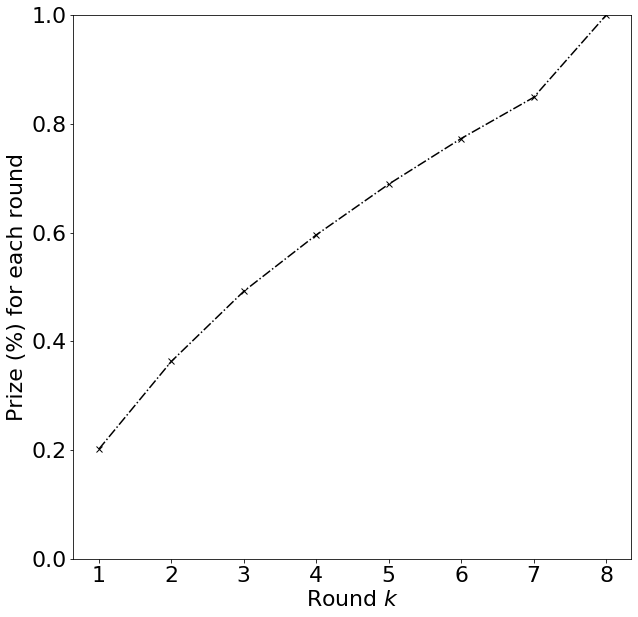

x [0.20165222 0.16132178 0.12905742 0.10373057 0.09335751 0.08402176
 0.07561958 0.15123917]
fun -0.2016522204564989
nit 20
status 0
slack [0.         0.04033044 0.04876083 0.         0.         0.
 0.00048463 0.01037306 0.00933575 0.00840218 0.02016522 0.01613218
 0.01242111 0.         0.         0.00756196 0.         0.        ]
message Optimization terminated successfully.
success True
[0.20165222 0.16132178 0.12905742 0.10373057 0.09335751 0.08402176
 0.07561958 0.15123917]
[0.20165222 0.16132178 0.12905742 0.10373057 0.09335751 0.08402176
 0.07561958 0.15123917]
[0.20165222 0.16132178 0.12905742 0.10373057 0.09335751 0.08402176
 0.07561958 0.15123917]
[0.20165222 0.16132178 0.12905742 0.10373057 0.09335751 0.08402176
 0.07561958 0.15123917]
[0.20165222 0.16132178 0.12905742 0.10373057 0.09335751 0.08402176
 0.07561958 0.15123917]
[0.20165222 0.16132178 0.12905742 0.10373057 0.09335751 0.08402176
 0.07561958 0.15123917]


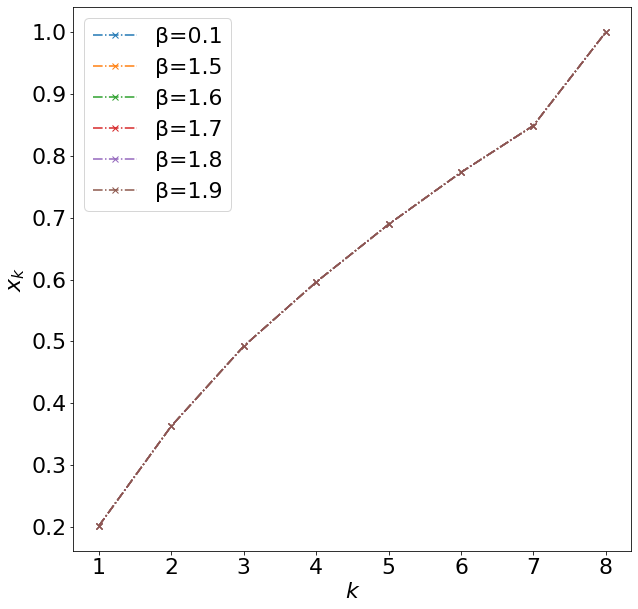

In [19]:
sols = []
beta = [0.1, 1.5,1.6, 1.7,1.8, 1.9]
for values in beta:
    s = tennis_model(alpha1 = 0.75, alpha2 = 0.95, lambda1 = 0.1, lambda2 = 0.2, gamma = 0.8, nu = 0.9, beta = values)
    sols.append(s)
plt.figure(figsize=(10,10))
x = [i for i in range(1,9)]
i = 0
for s in sols:
    print(s)
    plt.plot(x, pd.DataFrame(s, columns=['prize per round'])['prize per round'].cumsum(),'x-.', label=str(greek_letterz[1])+"="+str(beta[i]))
    i = i +1
plt.legend()
plt.xlabel('$k$')
plt.ylabel('$x_k$')
#plt.title(r'$\alpha > \beta$')
plt.show()

[0.19013683 0.1606952  0.13659092 0.11610228 0.09868694 0.0838839
 0.07130131 0.14260263]


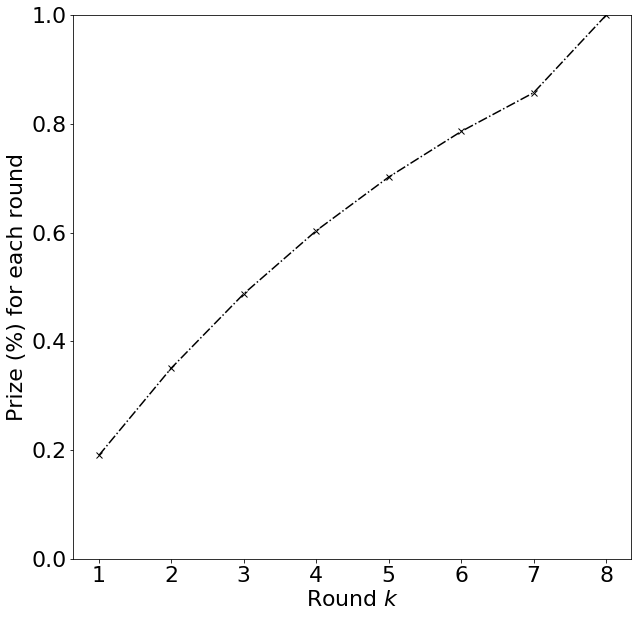

x [0.19013683 0.1606952  0.13659092 0.11610228 0.09868694 0.0838839
 0.07130131 0.14260263]
fun -0.19013683346666294
nit 18
status 0
slack [0.         0.01901368 0.05739737 0.         0.00858573 0.00803476
 0.00682955 0.00580511 0.00493435 0.00419419 0.00092111 0.
 0.         0.         0.         0.02139039 0.         0.        ]
message Optimization terminated successfully.
success True


In [20]:
s = tennis_model(alpha1 = 0.75, alpha2 = 0.85, lambda1 = 0.1, lambda2 = 0.2, gamma = 0.8, nu = 0.85, beta = 1.7)

# ID 1

[0.2092041  0.16736328 0.13389062 0.1071125  0.08569    0.07707519
 0.07322143 0.14644287]


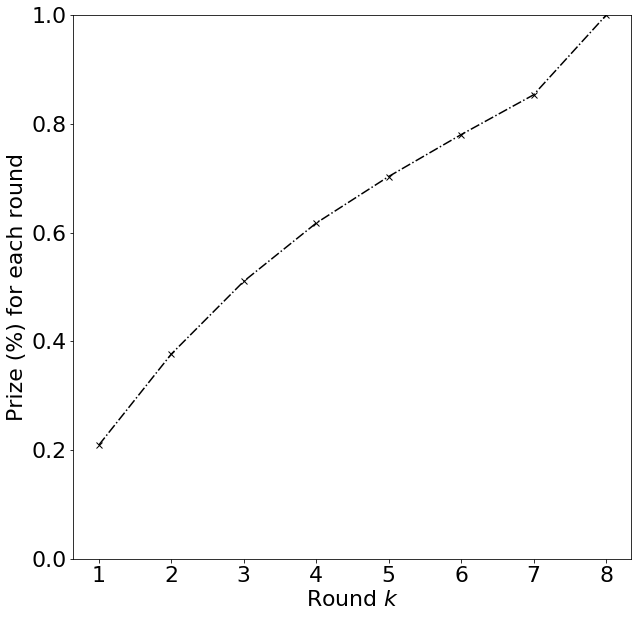

x [0.2092041  0.16736328 0.13389062 0.1071125  0.08569    0.07707519
 0.07322143 0.14644287]
fun -0.20920409951949112
nit 21
status 0
slack [0.         0.05230102 0.04644287 0.00355713 0.         0.
 0.         0.         0.0085232  0.03138061 0.02510449 0.
 0.02008359 0.01606687 0.0043303  0.02196643 0.         0.        ]
message Optimization terminated successfully.
success True
k:  128
j:  0
j:  1
j:  2
j:  3
j:  4
j:  5
j:  6
j:  7
j:  8
j:  9
j:  10
j:  11
j:  12
j:  13
j:  14
j:  15
j:  16
j:  17
j:  18
j:  19
j:  20
j:  21
j:  22
j:  23
j:  24
j:  25
j:  26
j:  27
j:  28
j:  29
j:  30
j:  31
j:  32
j:  33
j:  34
j:  35
j:  36
j:  37
j:  38
j:  39
j:  40
j:  41
j:  42
j:  43
j:  44
j:  45
j:  46
j:  47
j:  48
j:  49
j:  50
j:  51
j:  52
j:  53
j:  54
j:  55
j:  56
j:  57
j:  58
j:  59
j:  60
j:  61
j:  62
j:  63
0.20920409951949112
value:  0.20920409951949107
k:  64
j:  0
j:  1
j:  2
j:  3
j:  4
j:  5
j:  6
j:  7
j:  8
j:  9
j:  10
j:  11
j:  12
j:  13
j:  14
j:  15
j:  16
j:  1

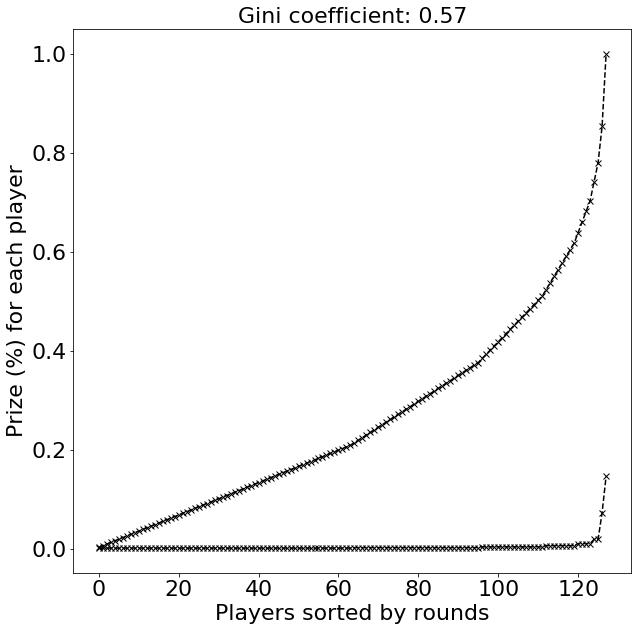

In [58]:
s1 = tennis_model(alpha1 = 0.70, alpha2 = 0.95, lambda1 = 0.1, lambda2 = 0.15, gamma = 0.8, nu = 0.95, beta = 1.7)
income1 = []
cum_income1 = []
i = 0
value = 0
for k in (128,64,32,16,8,4,1,1):
    print('k: ', str(k))
    if i < 6:
        for j in range(0,int(k/2)):
            print('j: ', str(j))
            value  = value + s1[i]/(k/2)
            cum_income1.append(value)
            income1.append(s1[i]/k)
    else: 
        value  = value + s1[i]/k
        income1.append(s1[i])
        cum_income1.append(value)
    print(s1[i])
    print('value: ', value)
    i = i  + 1
plt.figure(figsize=(10,10))
gini_ind = gini_coefficient(income1)
plt.title('Gini coefficient: '+ str(np.round(gini_ind,2)))
plt.plot(income1, 'bx--', color='black')
plt.plot(cum_income1, 'bx--', color='black')
plt.xlabel('Players sorted by rounds')
plt.ylabel('Prize (%) for each player')
plt.show()

[0.22464721 0.17971777 0.14377422 0.11501937 0.0920155  0.0736124
 0.05888992 0.11232361]


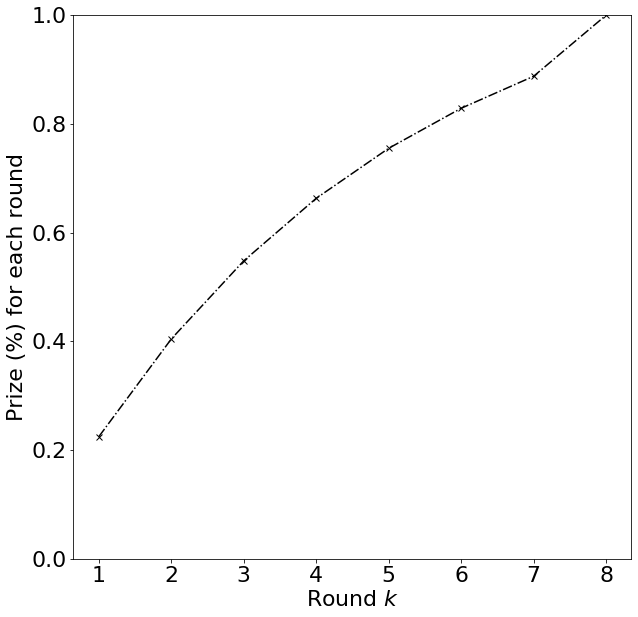

x [0.22464721 0.17971777 0.14377422 0.11501937 0.0920155  0.0736124
 0.05888992 0.11232361]
fun -0.22464721401511045
nit 20
status 0
slack [0.         0.10109125 0.01232361 0.03767639 0.         0.
 0.         0.         0.         0.03369708 0.02695767 0.
 0.02156613 0.01725291 0.01380232 0.01221074 0.         0.00545623]
message Optimization terminated successfully.
success True


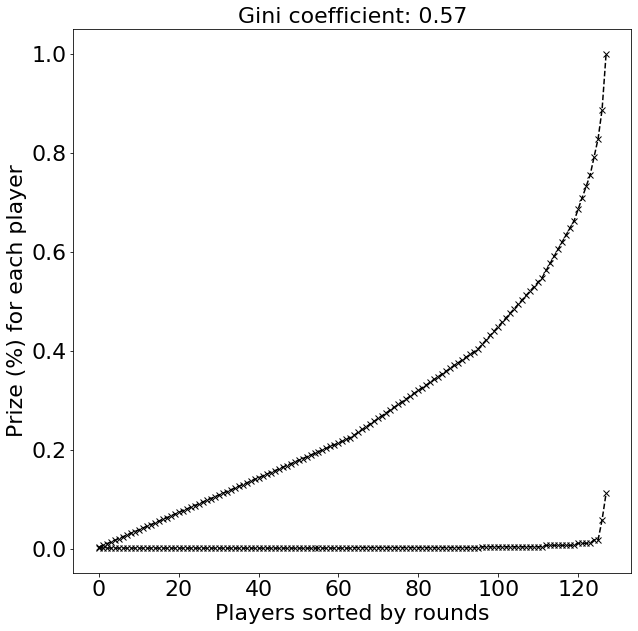

In [59]:
s2 = tennis_model(alpha1 = 0.50, alpha2 = 0.95, lambda1 = 0.1, lambda2 = 0.15, gamma = 0.8, nu = 0.95, beta = 1.7)
income2 = []
cum_income2 = []
i = 0
value = 0
for k in (128,64,32,16,8,4,1,1):
    if i < 6:
        for j in range(0,int(k/2)):
            value  = value + s2[i]/(k/2)
            cum_income2.append(value)
            income2.append(s2[i]/k)
    else: 
        value  = value + s2[i]/k
        income2.append(s2[i])
        cum_income2.append(value)
        
    i = i  + 1
plt.figure(figsize=(10,10))
gini_ind = gini_coefficient(income1)
plt.title('Gini coefficient: '+ str(np.round(gini_ind,2)))
plt.plot(income2, 'bx--', color='black')
plt.plot(cum_income2, 'bx--', color='black')
plt.xlabel('Players sorted by rounds')
plt.ylabel('Prize (%) for each player')
plt.show()

[0.19889797 0.15911838 0.1272947  0.10183576 0.08864266 0.08421053
 0.08       0.16      ]


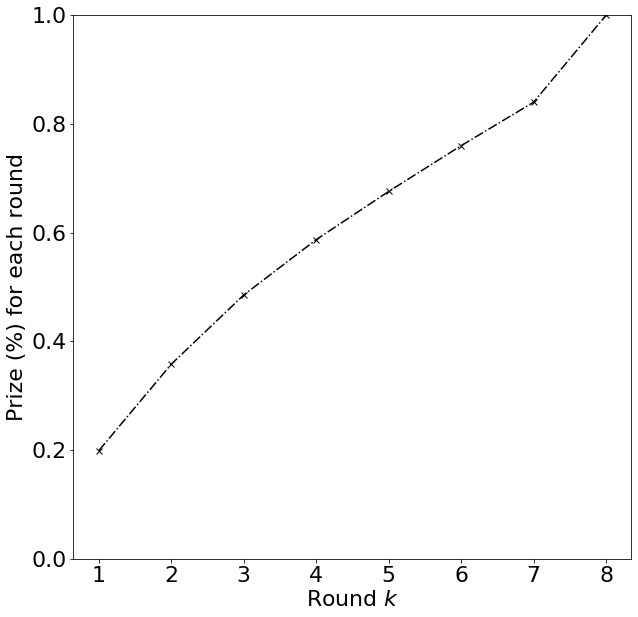

x [0.19889797 0.15911838 0.1272947  0.10183576 0.08864266 0.08421053
 0.08       0.16      ]
fun -0.19889797235922482
nit 15
status 0
slack [0.00088162 0.02895307 0.04       0.         0.         0.
 0.         0.00717405 0.0132964  0.01263158 0.02386776 0.01909421
 0.         0.00810131 0.         0.024      0.         0.        ]
message Optimization terminated successfully.
success True


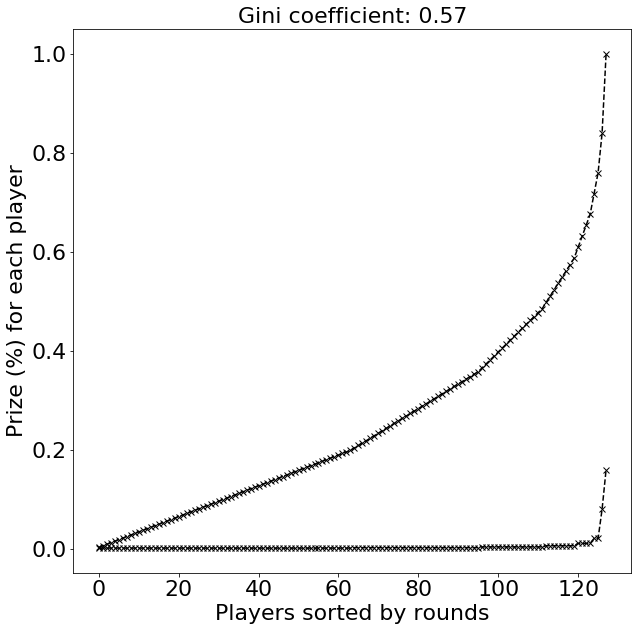

In [60]:
s3 = tennis_model(alpha1 = 0.80, alpha2 = 0.95, lambda1 = 0.16, lambda2 = 0.20, gamma = 0.8, nu = 0.95, beta = 1.7)

income3 = []
cum_income3 = []
i = 0
value = 0
for k in (128,64,32,16,8,4,1,1):
    if i < 6:
        for j in range(0,int(k/2)):
            value  = value + s3[i]/(k/2)
            cum_income3.append(value)
            income3.append(s3[i]/k)
    else: 
        value  = value + s3[i]/k
        income3.append(s3[i])
        cum_income3.append(value)
        
    i = i  + 1
plt.figure(figsize=(10,10))
gini_ind = gini_coefficient(income1)
plt.title('Gini coefficient: '+ str(np.round(gini_ind,2)))
plt.plot(income3, 'bx--', color='black')
plt.plot(cum_income3, 'bx--', color='black')
plt.xlabel('Players sorted by rounds')
plt.ylabel('Prize (%) for each player')
plt.show()

[0.18942774 0.15154219 0.12123375 0.09913982 0.09418283 0.08947368
 0.085      0.17      ]


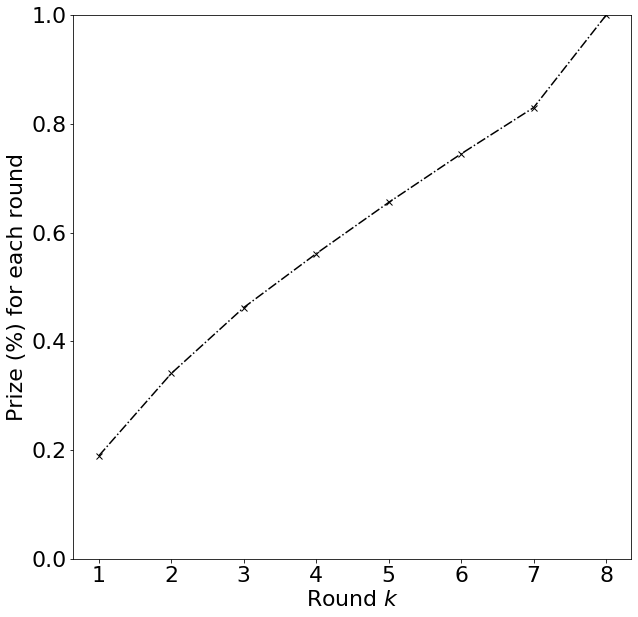

x [0.18942774 0.15154219 0.12123375 0.09913982 0.09418283 0.08947368
 0.085      0.17      ]
fun -0.1894277352479332
nit 14
status 0
slack [0.00898643 0.00995635 0.1        0.         0.         0.
 0.00215282 0.01487097 0.01412742 0.01342105 0.02273133 0.01603225
 0.         0.         0.         0.0085     0.         0.        ]
message Optimization terminated successfully.
success True


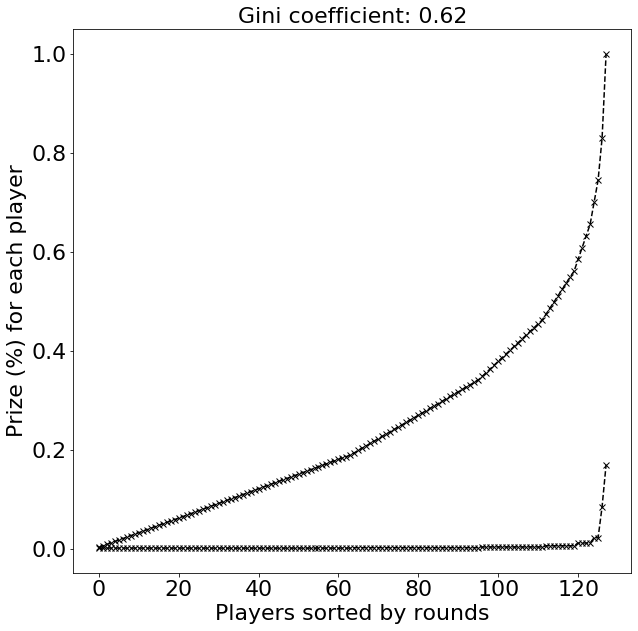

In [61]:
s4 = tennis_model(alpha1 = 0.85, alpha2 = 0.95, lambda1 = 0.17, lambda2 = 0.27, gamma = 0.8, nu = 0.95, beta = 1.9)
income4 = []
cum_income4 = []
y =[]
i = 0
value = 0
for k in (128,64,32,16,8,4,1,1):
    if i < 6:
        for j in range(0,int(k/2)):
            value  = value + s4[i]/(k/2)
            cum_income4.append(value)
            income4.append(s4[i]/k)
    else: 
        value  = value + s4[i]/k
        income4.append(s4[i])
        cum_income4.append(value)
 
        
    i = i  + 1
plt.figure(figsize=(10,10))
gini_ind = gini_coefficient(income4)
plt.title('Gini coefficient: '+ str(np.round(gini_ind,2)))
plt.plot(income4, 'bx--', color='black')
plt.plot(cum_income4, 'bx--', color='black')
plt.xlabel('Players sorted by rounds')
plt.ylabel('Prize (%) for each player')
plt.show()

[0.22464721 0.17971777 0.14377422 0.11501937 0.0920155  0.0736124
 0.05888992 0.11232361]
[0.2092041  0.16736328 0.13389062 0.1071125  0.08569    0.07707519
 0.07322143 0.14644287]
[0.19889797 0.15911838 0.1272947  0.10183576 0.08864266 0.08421053
 0.08       0.16      ]
[0.18942774 0.15154219 0.12123375 0.09913982 0.09418283 0.08947368
 0.085      0.17      ]


Text(0, 0.5, '$x_k$')

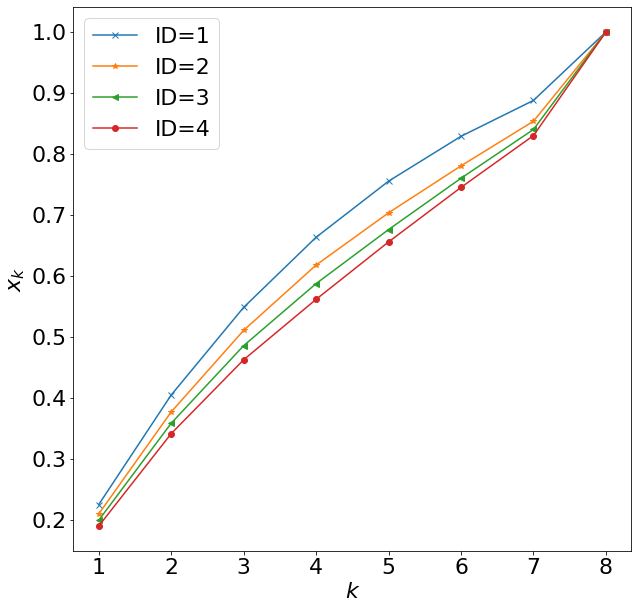

In [62]:
SMALL_SIZE = 18
MEDIUM_SIZE = 22
BIGGER_SIZE = 22
plt.rc('font', size=MEDIUM_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=MEDIUM_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=MEDIUM_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) 
sols = [s2, s1, s3, s4]
marker = ['x-', '*-', '<-', 'o-']
plt.figure(figsize=(10,10))
i = 0
for s in sols:
    print(s)
    plt.plot(x, pd.DataFrame(s, columns=['prize per round'])['prize per round'].cumsum(),marker[i], label="ID="+str(i+1))
    i = i +1
plt.legend()
plt.xlabel('$k$')
plt.ylabel('$x_k$')

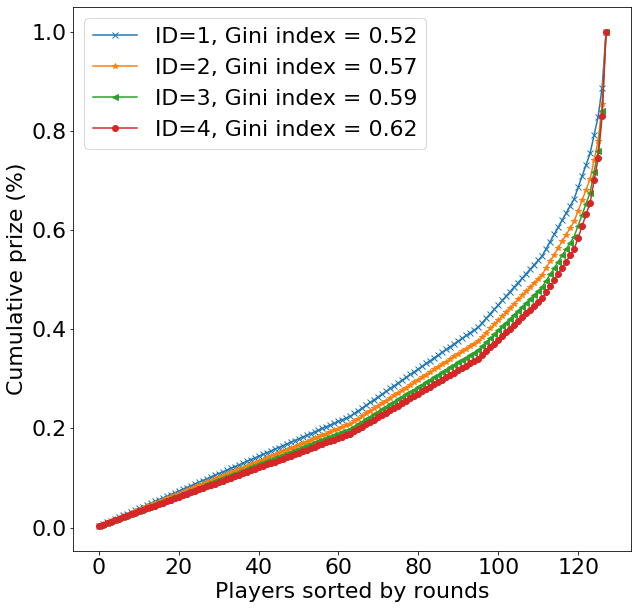

In [63]:
sols = [cum_income1, cum_income2, cum_income3, cum_income4]
marker = ['x-', '*-', '<-', 'o-']
plt.figure(figsize=(10,10))

plt.plot(sols[1], marker[0], label="ID=1, Gini index = 0.52")
plt.plot(sols[0], marker[1], label="ID=2, Gini index = 0.57")
plt.plot(sols[2], marker[2], label="ID=3, Gini index = 0.59")
plt.plot(sols[3], marker[3], label="ID=4, Gini index = 0.62")
plt.legend()
#plt.plot(cum_income4, 'bx--', color='black')
plt.xlabel('Players sorted by rounds')
plt.ylabel('Cumulative prize (%)')
plt.show()